In [1]:
##Importing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Plant Weather Data
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')


In [2]:
os.chdir('C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Solar Power Forecasting')

In [4]:
pwd

'C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Solar Power Forecasting'

In [2]:
# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Plant Weather Data
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [5]:
df_gen.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [6]:
df_weather.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

In [7]:
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB
None


In [11]:
df_gen.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [12]:
df_weather.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

In [13]:
df_weather['SOURCE_KEY'].unique()

array(['iq8k7ZNt4Mwm3w0'], dtype=object)

In [8]:
df_gen.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [9]:
df_weather.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

### PRELIMINARY ANALYSIS

In [17]:
df_gen.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [18]:
df_weather.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

In [14]:
print('Plant ID ',df_gen.PLANT_ID.nunique())
print('No. of Inverters ',df_gen.SOURCE_KEY.nunique())
print('No. of Unique Source key',df_weather.SOURCE_KEY.nunique())
print('Null values in generation data: \n',df_gen.isnull().sum())
print('Null values in generation data: \n',df_weather.isnull().sum())

Plant ID  1
No. of Inverters  22
No. of Unique Source key 1
Null values in generation data: 
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
Null values in generation data: 
 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [15]:
# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')



df_gen.drop('PLANT_ID', axis=1, inplace=True)
df_weather.drop('PLANT_ID', axis = 1, inplace=True)
#df_weather.drop('SOURCE_KEY', axis = 1, inplace=True)

In [357]:
df_weather.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00            27.004764           25.060789          0.0
1  2020-05-15 00:15:00            26.880811           24.421869          0.0
2  2020-05-15 00:30:00            26.682055           24.427290          0.0
3  2020-05-15 00:45:00            26.500589           24.420678          0.0
4  2020-05-15 01:00:00            26.596148           25.088210          0.0

OBSERVATIONS:

1.Generation data for all inverters is not available for all the blocks.

  We need to include blocks where data for all inverters is present.

2.Weather data is fully present.



In [22]:
#Checking for Null values
df_gen.isnull().sum()

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [219]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   Inverter_No  67698 non-null  int64  
 2   DC_POWER     67698 non-null  float64
 3   AC_POWER     67698 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ MB


In [23]:
df_weather.isnull().any()

DATE_TIME              False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool

In [24]:
df_weather.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00            27.004764           25.060789          0.0
1  2020-05-15 00:15:00            26.880811           24.421869          0.0
2  2020-05-15 00:30:00            26.682055           24.427290          0.0
3  2020-05-15 00:45:00            26.500589           24.420678          0.0
4  2020-05-15 01:00:00            26.596148           25.088210          0.0

In [25]:
df_gen.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0  2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1  2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2  2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3  2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4  2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD  
0  2.429011e+06  
1  1.215279e+09  
2  2.247720e+09  
3  1.704250e+06  
4  1.994153e+07

No missing values found in both dataframes

In [26]:
# Drop Source Key Column as we have replaced codes with inverter numbers

In [18]:
## Droping common PLANT_ID
#df_gen.drop('PLANT_ID', axis=1, inplace=True)
#df_weather.drop('PLANT_ID', axis = 1, inplace=True)

c

In [19]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   AMBIENT_TEMPERATURE  3259 non-null   float64
 2   MODULE_TEMPERATURE   3259 non-null   float64
 3   IRRADIATION          3259 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.0+ KB


In [20]:
df_gen.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0  2020-05-15 00:00:00       0.0       0.0  9425.000000  2.429011e+06   
1  2020-05-15 00:00:00       0.0       0.0     0.000000  1.215279e+09   
2  2020-05-15 00:00:00       0.0       0.0  3075.333333  2.247720e+09   
3  2020-05-15 00:00:00       0.0       0.0   269.933333  1.704250e+06   
4  2020-05-15 00:00:00       0.0       0.0  3177.000000  1.994153e+07   

   Inverter_No  
0            1  
1            2  
2            3  
3            4  
4            5

In [565]:
df_gen_old = df_gen.copy()

In [29]:
df_gen['Inverter_No'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [348]:
df_gen.head()

DATE_TIME  Inverter_No  DC_POWER  AC_POWER  DAILY_YIELD  \
0  2020-05-15 00:00:00            1       0.0       0.0  9425.000000   
1  2020-05-15 00:00:00            2       0.0       0.0     0.000000   
2  2020-05-15 00:00:00            3       0.0       0.0  3075.333333   
3  2020-05-15 00:00:00            4       0.0       0.0   269.933333   
4  2020-05-15 00:00:00            5       0.0       0.0  3177.000000   

    TOTAL_YIELD  
0  2.429011e+06  
1  1.215279e+09  
2  2.247720e+09  
3  1.704250e+06  
4  1.994153e+07

In [11]:
#Reordering and dropping Daily yield and Total yield
df_gen = df_gen[['DATE_TIME','Inverter_No' ,'DC_POWER', 'AC_POWER']]
df_gen.groupby('Inverter_No')[['DATE_TIME']].count()

DATE_TIME
Inverter_No           
1                 3195
2                 3259
3                 3259
4                 3195
5                 2355
6                 3259
7                 3259
8                 3195
9                 2355
10                3259
11                3195
12                3195
13                3259
14                3259
15                2355
16                3195
17                3259
18                3259
19                3259
20                3259
21                2355
22                3259

In [59]:
df_gen.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0  2020-05-15 00:00:00       0.0       0.0  9425.000000  2.429011e+06   
1  2020-05-15 00:00:00       0.0       0.0     0.000000  1.215279e+09   
2  2020-05-15 00:00:00       0.0       0.0  3075.333333  2.247720e+09   
3  2020-05-15 00:00:00       0.0       0.0   269.933333  1.704250e+06   
4  2020-05-15 00:00:00       0.0       0.0  3177.000000  1.994153e+07   

   Inverter_No  
0            1  
1            2  
2            3  
3            4  
4            5

In [ ]:
df_old_grouped_mean = df_gen.groupby('Inverter_No')[['DATE_TIME','DC_POWER','AC_POWER']].agg(['mean']).reset_index(drop=True)

In [ ]:
df_old_grouped_max = df_gen_old.groupby('Inverter_No')[['DATE_TIME','DC_POWER','AC_POWER']].agg(['max']).reset_index(drop=True)

<AxesSubplot:>

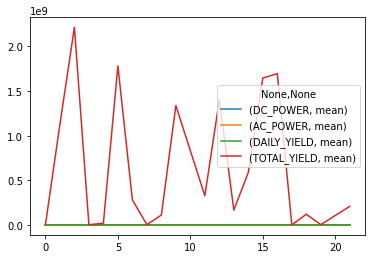

In [567]:
df_old_grouped_mean.plot()

In [79]:
df_old_grouped_max.index+1

RangeIndex(start=1, stop=23, step=1)

In [376]:
a=list(df_gen['Inverter_No'].unique
       ())

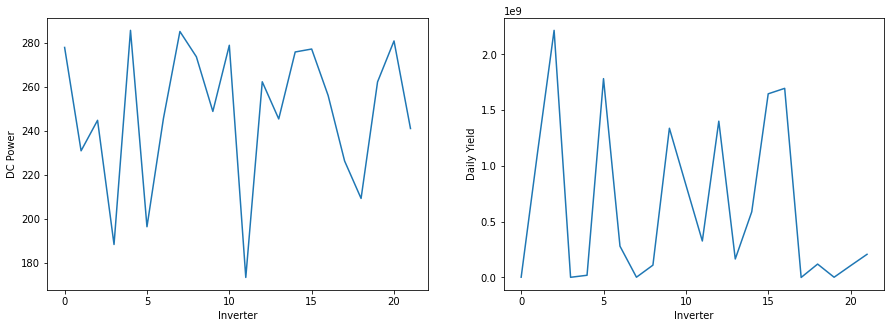

In [571]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
fig.suptitle('DC Power &, Daily Yield')
ax1.plot(df_old_grouped_mean['DC_POWER'])
ax2.plot(df_old_grouped_mean['TOTAL_YIELD'])
ax1.set_xlabel('Inverter')
ax1.set_ylabel('DC Power')

ax2.set_xlabel('Inverter')
ax2.set_ylabel('Daily Yield')
#plt.ylabel('DC Power')
plt.show()

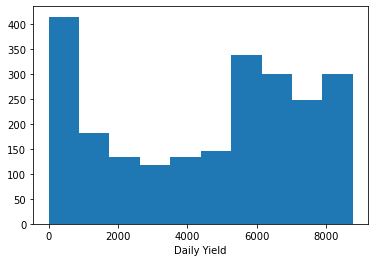

In [83]:
# plt.hist(df_gen[(df_gen['Inverter_No']==4)&(df_gen['DAILY_YIELD']!=0)]['DAILY_YIELD'])
# plt.xlabel('Daily Yield')

# plt.show()

In [56]:
pd.set_option('display.max_rows', 1000)
# df.head(1000)

DATE_TIME  Inverter_No      DC_POWER     AC_POWER  DAILY_YIELD
0    15-05-2020 00:00            1      0.000000     0.000000     0.000000
1    15-05-2020 00:00            2      0.000000     0.000000     0.000000
2    15-05-2020 00:00            3      0.000000     0.000000     0.000000
3    15-05-2020 00:00            4      0.000000     0.000000     0.000000
4    15-05-2020 00:00            5      0.000000     0.000000     0.000000
5    15-05-2020 00:00            6      0.000000     0.000000     0.000000
6    15-05-2020 00:00            7      0.000000     0.000000     0.000000
7    15-05-2020 00:00            8      0.000000     0.000000     0.000000
8    15-05-2020 00:00            9      0.000000     0.000000     0.000000
9    15-05-2020 00:00           10      0.000000     0.000000     0.000000
10   15-05-2020 00:00           11      0.000000     0.000000     0.000000
11   15-05-2020 00:00           12      0.000000     0.000000     0.000000
12   15-05-2020 00:00           13      0.000000     0.000000     0.000000
13   15-05-2020 00:00           14      0.000000     0.000000     0.000000
14   15-05-2020 00:00           15      0.000000     0.000000     0.000000
15   15-05-2020 00:00           16      0.000000     0.000000     0.000000
16   15-05-2020 00:00           17      0.000000     0.000000     0.000000
17   15-05-2020 00:00           18      0.000000     0.000000     0.000000
18   15-05-2020 00:00           19      0.000000     0.000000     0.000000
19   15-05-2020 00:00           20      0.000000     0.000000     0.000000
20   15-05-2020 00:00           21      0.000000     0.000000     0.000000
21   15-05-2020 00:15            1      0.000000     0.000000     0.000000
22   15-05-2020 00:15            2      0.000000     0.000000     0.000000
23   15-05-2020 00:15            3      0.000000     0.000000     0.000000
24   15-05-2020 00:15            4      0.000000     0.000000     0.000000
25   15-05-2020 00:15            5      0.000000     0.000000     0.000000
26   15-05-2020 00:15            6      0.000000     0.000000     0.000000
27   15-05-2020 00:15            7      0.000000     0.000000     0.000000
28   15-05-2020 00:15            8      0.000000     0.000000     0.000000
29   15-05-2020 00:15            9      0.000000     0.000000     0.000000
30   15-05-2020 00:15           10      0.000000     0.000000     0.000000
31   15-05-2020 00:15           11      0.000000     0.000000     0.000000
32   15-05-2020 00:15           12      0.000000     0.000000     0.000000
33   15-05-2020 00:15           13      0.000000     0.000000     0.000000
34   15-05-2020 00:15           14      0.000000     0.000000     0.000000
35   15-05-2020 00:15           15      0.000000     0.000000     0.000000
36   15-05-2020 00:15           16      0.000000     0.000000     0.000000
37   15-05-2020 00:15           17      0.000000     0.000000     0.000000
38   15-05-2020 00:15           18      0.000000     0.000000     0.000000
39   15-05-2020 00:15           19      0.000000     0.000000     0.000000
40   15-05-2020 00:15           20      0.000000     0.000000     0.000000
41   15-05-2020 00:15           21      0.000000     0.000000     0.000000
42   15-05-2020 00:30            1      0.000000     0.000000     0.000000
43   15-05-2020 00:30            2      0.000000     0.000000     0.000000
44   15-05-2020 00:30            3      0.000000     0.000000     0.000000
45   15-05-2020 00:30            4      0.000000     0.000000     0.000000
46   15-05-2020 00:30            5      0.000000     0.000000     0.000000
47   15-05-2020 00:30            6      0.000000     0.000000     0.000000
48   15-05-2020 00:30            7      0.000000     0.000000     0.000000
49   15-05-2020 00:30            8      0.000000     0.000000     0.000000
50   15-05-2020 00:30            9      0.000000     0.000000     0.000000
51   15-05-2020 00:30           10      0.000000     0.000000     0.000000
52   15-05-2020 00:30           11   

In [21]:
df_gen.groupby('Inverter_No')['DATE_TIME'].count()

Inverter_No
1     3195
2     3259
3     3259
4     3195
5     2355
6     3259
7     3259
8     3195
9     2355
10    3259
11    3195
12    3195
13    3259
14    3259
15    2355
16    3195
17    3259
18    3259
19    3259
20    3259
21    2355
22    3259
Name: DATE_TIME, dtype: int64

We cannot infer from the above graphs since a lot of missing values are there. Will have to first impute these values

In [52]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [60]:
print('Inverter {} has data for {} timestamps(Minimum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmin()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))
print('Inverter {} has data for {} timestamps(Maximum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmax()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().max()))     
print('DIFFERENCE = {}'.format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().max() - 
                               df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))

Inverter 5 has data for 2355 timestamps(Minimum)
Inverter 2 has data for 3259 timestamps(Maximum)
DIFFERENCE = 904


51 blocks or 13 hours data is missing for one inverter. We need to consider this while adding generation of individual inverters.

In [379]:
df_gen['Inverter_No'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [575]:
df_gen.to_csv('df_gen.csv')

In [574]:
df_gen_copy=df_gen.copy()

In [62]:
df_gen.drop(['DAILY_YIELD','TOTAL_YIELD'], axis=1, inplace=True)

In [63]:
from functools import reduce

grouped = df_gen.groupby('Inverter_No')

## Making a list of each Inverter group 
dfs = list()
for i in df_gen['Inverter_No'].unique():
    dfs.append(grouped.get_group(i))
  

 ## Merging data inverterwise using 'reduce'
 ## Applying merge function to all of the list elements of 'dfs' in the sequence passed.

df_new = reduce(lambda left,right: pd.merge(left,right,on=['DATE_TIME'],how='outer'),dfs)

display(df_new)

DATE_TIME  DC_POWER_x  AC_POWER_x  Inverter_No_x  DC_POWER_y  \
0     2020-05-15 00:00:00         0.0         0.0            1.0         0.0   
1     2020-05-15 00:15:00         0.0         0.0            1.0         0.0   
2     2020-05-15 00:30:00         0.0         0.0            1.0         0.0   
3     2020-05-15 00:45:00         0.0         0.0            1.0         0.0   
4     2020-05-15 01:00:00         0.0         0.0            1.0         0.0   
...                   ...         ...         ...            ...         ...   
3254  2020-05-20 13:00:00         NaN         NaN            NaN         0.0   
3255  2020-05-20 13:15:00         NaN         NaN            NaN         0.0   
3256  2020-05-20 13:30:00         NaN         NaN            NaN         0.0   
3257  2020-05-20 13:45:00         NaN         NaN            NaN         0.0   
3258  2020-05-20 14:00:00         NaN         NaN            NaN         0.0   

      AC_POWER_y  Inverter_No_y  DC_POWER_x  AC_POWER_x  Inverter_No_x  ...  \
0            0.0              2         0.0         0.0              3  ...   
1            0.0              2         0.0         0.0              3  ...   
2            0.0              2         0.0         0.0              3  ...   
3            0.0              2         0.0         0.0              3  ...   
4            0.0              2         0.0         0.0              3  ...   
...          ...            ...         ...         ...            ...  ...   
3254         0.0              2         0.0         0.0              3  ...   
3255         0.0              2         0.0         0.0              3  ...   
3256         0.0              2         0.0         0.0              3  ...   
3257         0.0              2         0.0         0.0              3  ...   
3258         0.0              2         0.0         0.0              3  ...   

      Inverter_No_x   DC_POWER_y   AC_POWER_y  Inverter_No_y  DC_POWER_x  \
0                19     0.000000     0.000000             20         0.0   
1                19     0.000000     0.000000             20         0.0   
2                19     0.000000     0.000000             20         0.0   
3                19     0.000000     0.000000             20         0.0   
4                19     0.000000     0.000000             20         0.0   
...             ...          ...          ...            ...         ...   
3254             19  1299.906667  1267.406667             20         NaN   
3255             19  1286.700000  1254.526667             20         NaN   
3256             19  1224.671429  1194.050000             20         NaN   
3257             19  1200.953333  1170.946667             20         NaN   
3258             19  1199.550000  1169.600000             20         NaN   

      AC_POWER_x  Inverter_No_x  DC_POWER_y  AC_POWER_y  Inverter_No_y  
0            0.0           21.0         0.0         0.0             22  
1            0.0           21.0         0.0         0.0             22  
2            0.0           21.0         0.0         0.0             22  
3            0.0           21.0         0.0         0.0             22  
4            0.0           21.0         0.0         0.0             22  
...          ...            ...         ...         ...            ...  
3254         NaN            NaN         0.0         0.0             22  
3255         NaN            NaN         0.0         0.0             22  
3256         NaN            NaN         0.0         0.0             22  
3257         NaN            NaN         0.0         0.0             22  
3258         NaN            NaN         0.0         0.0             22  

[3259 rows x 67 columns]

In [64]:
df_new.columns = ['DATE_TIME',
        'DC_POWER_1', 'AC_POWER_1',
        'Inverter_No_1', 'DC_POWER_2', 'AC_POWER_2',
        'Inverter_No_2', 'DC_POWER_3', 'AC_POWER_3',
        'Inverter_No_3', 'DC_POWER_4', 'AC_POWER_4',
        'Inverter_No_4', 'DC_POWER_5', 'AC_POWER_5',
        'Inverter_No_5', 'DC_POWER_6', 'AC_POWER_6',
        'Inverter_No_6', 'DC_POWER_7', 'AC_POWER_7',
        'Inverter_No_7', 'DC_POWER_8', 'AC_POWER_8',
        'Inverter_No_8', 'DC_POWER_9', 'AC_POWER_9',
        'Inverter_No_9', 'DC_POWER_10', 'AC_POWER_10',
        'Inverter_No_10', 'DC_POWER_11', 'AC_POWER_11',
        'Inverter_No_11', 'DC_POWER_12', 'AC_POWER_12',
        'Inverter_No_12', 'DC_POWER_13', 'AC_POWER_13',
        'Inverter_No_13', 'DC_POWER_14', 'AC_POWER_14',
        'Inverter_No_14', 'DC_POWER_15', 'AC_POWER_15',
        'Inverter_No_15', 'DC_POWER_16', 'AC_POWER_16',
        'Inverter_No_16', 'DC_POWER_17', 'AC_POWER_17',
        'Inverter_No_17', 'DC_POWER_18', 'AC_POWER_18',
        'Inverter_No_18', 'DC_POWER_19', 'AC_POWER_19',
        'Inverter_No_19', 'DC_POWER_20', 'AC_POWER_20',
        'Inverter_No_20', 'DC_POWER_21', 'AC_POWER_21',
        'Inverter_No_21', 'DC_POWER_22', 'AC_POWER_22',
        'Inverter_No_22'
      ]


In [68]:
display(df_new)

DATE_TIME  DC_POWER_1  AC_POWER_1  Inverter_No_1  DC_POWER_2  \
0     2020-05-15 00:00:00         0.0         0.0            1.0         0.0   
1     2020-05-15 00:15:00         0.0         0.0            1.0         0.0   
2     2020-05-15 00:30:00         0.0         0.0            1.0         0.0   
3     2020-05-15 00:45:00         0.0         0.0            1.0         0.0   
4     2020-05-15 01:00:00         0.0         0.0            1.0         0.0   
...                   ...         ...         ...            ...         ...   
3254  2020-05-20 13:00:00         NaN         NaN            NaN         0.0   
3255  2020-05-20 13:15:00         NaN         NaN            NaN         0.0   
3256  2020-05-20 13:30:00         NaN         NaN            NaN         0.0   
3257  2020-05-20 13:45:00         NaN         NaN            NaN         0.0   
3258  2020-05-20 14:00:00         NaN         NaN            NaN         0.0   

      AC_POWER_2  Inverter_No_2  DC_POWER_3  AC_POWER_3  Inverter_No_3  ...  \
0            0.0              2         0.0         0.0              3  ...   
1            0.0              2         0.0         0.0              3  ...   
2            0.0              2         0.0         0.0              3  ...   
3            0.0              2         0.0         0.0              3  ...   
4            0.0              2         0.0         0.0              3  ...   
...          ...            ...         ...         ...            ...  ...   
3254         0.0              2         0.0         0.0              3  ...   
3255         0.0              2         0.0         0.0              3  ...   
3256         0.0              2         0.0         0.0              3  ...   
3257         0.0              2         0.0         0.0              3  ...   
3258         0.0              2         0.0         0.0              3  ...   

      Inverter_No_19  DC_POWER_20  AC_POWER_20  Inverter_No_20  DC_POWER_21  \
0                 19     0.000000     0.000000              20          0.0   
1                 19     0.000000     0.000000              20          0.0   
2                 19     0.000000     0.000000              20          0.0   
3                 19     0.000000     0.000000              20          0.0   
4                 19     0.000000     0.000000              20          0.0   
...              ...          ...          ...             ...          ...   
3254              19  1299.906667  1267.406667              20          NaN   
3255              19  1286.700000  1254.526667              20          NaN   
3256              19  1224.671429  1194.050000              20          NaN   
3257              19  1200.953333  1170.946667              20          NaN   
3258              19  1199.550000  1169.600000              20          NaN   

      AC_POWER_21  Inverter_No_21  DC_POWER_22  AC_POWER_22  Inverter_No_22  
0             0.0            21.0          0.0          0.0              22  
1             0.0            21.0          0.0          0.0              22  
2             0.0            21.0          0.0          0.0              22  
3             0.0            21.0          0.0          0.0              22  
4             0.0            21.0          0.0          0.0              22  
...           ...             ...          ...          ...             ...  
3254          NaN             NaN          0.0          0.0              22  
3255          NaN             NaN          0.0          0.0              22  
3256          NaN             NaN          0.0          0.0              22  
3257          NaN             NaN          0.0          0.0              22  
3258          NaN             NaN          0.0          0.0              22  

[3259 rows x 67 columns]

In [49]:
df_new.to_csv('before_merging.csv')

In [50]:
df_new['DATE'] = pd.to_datetime(df_new['DATE_TIME']).dt.date.astype(str)

In [51]:
df2 = df_new.copy()

In [204]:
df_new=df2.copy()


In [54]:
print(len(df_weather[~df_weather['DATE_TIME'].isin(df_gen['DATE_TIME'])]),
      len(df_gen[~df_gen['DATE_TIME'].isin(df_weather['DATE_TIME'])]))
print(df_weather.shape,df_new.shape)

0 0
(3259, 4) (3259, 112)


All common dates are present in both datasets

In [78]:
df_weather['DATE_TIME'] = df_weather['DATE_TIME'].astype(str)
df_new['DATE_TIME'] = df_new['DATE_TIME'].astype(str)
df = df_weather.merge(df_new,left_on='DATE_TIME',right_on='DATE_TIME',how='outer')
display(df)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            27.004764           25.060789   
1     2020-05-15 00:15:00            26.880811           24.421869   
2     2020-05-15 00:30:00            26.682055           24.427290   
3     2020-05-15 00:45:00            26.500589           24.420678   
4     2020-05-15 01:00:00            26.596148           25.088210   
...                   ...                  ...                 ...   
3254  2020-06-17 22:45:00            23.511703           22.856201   
3255  2020-06-17 23:00:00            23.482282           22.744190   
3256  2020-06-17 23:15:00            23.354743           22.492245   
3257  2020-06-17 23:30:00            23.291048           22.373909   
3258  2020-06-17 23:45:00            23.202871           22.535908   

      IRRADIATION  DC_POWER_1  AC_POWER_1  Inverter_No_1  DC_POWER_2  \
0             0.0         0.0         0.0            1.0         0.0   
1             0.0         0.0         0.0            1.0         0.0   
2             0.0         0.0         0.0            1.0         0.0   
3             0.0         0.0         0.0            1.0         0.0   
4             0.0         0.0         0.0            1.0         0.0   
...           ...         ...         ...            ...         ...   
3254          0.0         0.0         0.0            1.0         0.0   
3255          0.0         0.0         0.0            1.0         0.0   
3256          0.0         0.0         0.0            1.0         0.0   
3257          0.0         0.0         0.0            1.0         0.0   
3258          0.0         0.0         0.0            1.0         0.0   

      AC_POWER_2  Inverter_No_2  ...  Inverter_No_19  DC_POWER_20  \
0            0.0              2  ...              19          0.0   
1            0.0              2  ...              19          0.0   
2            0.0              2  ...              19          0.0   
3            0.0              2  ...              19          0.0   
4            0.0              2  ...              19          0.0   
...          ...            ...  ...             ...          ...   
3254         0.0              2  ...              19          0.0   
3255         0.0              2  ...              19          0.0   
3256         0.0              2  ...              19          0.0   
3257         0.0              2  ...              19          0.0   
3258         0.0              2  ...              19          0.0   

      AC_POWER_20  Inverter_No_20  DC_POWER_21  AC_POWER_21  Inverter_No_21  \
0             0.0              20          0.0          0.0            21.0   
1             0.0              20          0.0          0.0            21.0   
2             0.0              20          0.0          0.0            21.0   
3             0.0              20          0.0          0.0            21.0   
4             0.0              20          0.0          0.0            21.0   
...           ...             ...          ...          ...             ...   
3254          0.0              20          0.0          0.0            21.0   
3255          0.0              20          0.0          0.0            21.0   
3256          0.0              20          0.0          0.0            21.0   
3257          0.0              20          0.0          0.0            21.0   
3258          0.0              20          0.0          0.0            21.0   

      DC_POWER_22  AC_POWER_22  Inverter_No_22  
0             0.0          0.0              22  
1             0.0          0.0              22  
2             0.0          0.0              22  
3             0.0          0.0              22  
4             0.0          0.0              22  
...           ...          ...             ...  
3254          0.0          0.0              22  
3255          0.0          0.0              22  
3256          0.0          0.0              22  
3257          0.0          0.0            

In [71]:

tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')
tb=tb[:-1] 
ts = tb.strftime('%H:%M')
block_dict = {}
j=1
for i in range(len(ts)):
    block_dict[ts[i]] =  j
    j+=1

    ## Saving and loading as dictionary
np.save('timestamp_block_dictionary.npy',block_dict)

In [ ]:
block_dict = np.load('timestamp_block_dictionary.npy',allow_pickle='TRUE').item() 

In [84]:
df['TIME'] = df['DATE_TIME'].apply(lambda x:str(x)[-8:-3])
df['DATE'] = pd.to_datetime(df['DATE_TIME']).dt.date
df['BLOCK'] = pd.to_datetime(df['TIME']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])
df.drop('DATE_TIME',axis=1,inplace=True)

In [596]:
df.to_csv('df_new_merged_with_weather.csv')

In [12]:
df = pd.read_csv('df_new_merged_with_weather.csv')

In [13]:
df = df.iloc[:,1:]

In [598]:
df.duplicated().sum()

0

In [20]:
df.columns = ['AMBIENT_TEMPERATURE',
 'MODULE_TEMPERATURE','IRRADIATION',
         'Inverter_No_1', 'DC_POWER_1', 'AC_POWER_1',
        'Inverter_No_2', 'DC_POWER_2', 'AC_POWER_2',
        'Inverter_No_3', 'DC_POWER_3', 'AC_POWER_3',
        'Inverter_No_4', 'DC_POWER_4', 'AC_POWER_4',
        'Inverter_No_5', 'DC_POWER_5', 'AC_POWER_5',
        'Inverter_No_6', 'DC_POWER_6', 'AC_POWER_6',
        'Inverter_No_7', 'DC_POWER_7', 'AC_POWER_7',
        'Inverter_No_8', 'DC_POWER_8', 'AC_POWER_8',
        'Inverter_No_9', 'DC_POWER_9', 'AC_POWER_9',
        'Inverter_No_10', 'DC_POWER_10', 'AC_POWER_10',
        'Inverter_No_11', 'DC_POWER_11', 'AC_POWER_11',
        'Inverter_No_12', 'DC_POWER_12', 'AC_POWER_12',
        'Inverter_No_13', 'DC_POWER_13', 'AC_POWER_13',
        'Inverter_No_14', 'DC_POWER_14', 'AC_POWER_14',
        'Inverter_No_15', 'DC_POWER_15', 'AC_POWER_15',
        'Inverter_No_16', 'DC_POWER_16', 'AC_POWER_16',
        'Inverter_No_17', 'DC_POWER_17', 'AC_POWER_17',
        'Inverter_No_18', 'DC_POWER_18', 'AC_POWER_18',
        'Inverter_No_19', 'DC_POWER_19', 'AC_POWER_19',
        'Inverter_No_20', 'DC_POWER_20', 'AC_POWER_20',
        'Inverter_No_21', 'DC_POWER_21', 'AC_POWER_21',
        'Inverter_No_22', 'DC_POWER_22', 'AC_POWER_22',
         'TIME','DATE','BLOCK'
      ]


In [92]:
display(df)

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0         1  2020-05-15  00:00            27.004764           25.060789   
1         2  2020-05-15  00:15            26.880811           24.421869   
2         3  2020-05-15  00:30            26.682055           24.427290   
3         4  2020-05-15  00:45            26.500589           24.420678   
4         5  2020-05-15  01:00            26.596148           25.088210   
...     ...         ...    ...                  ...                 ...   
3254     92  2020-06-17  22:45            23.511703           22.856201   
3255     93  2020-06-17  23:00            23.482282           22.744190   
3256     94  2020-06-17  23:15            23.354743           22.492245   
3257     95  2020-06-17  23:30            23.291048           22.373909   
3258     96  2020-06-17  23:45            23.202871           22.535908   

      IRRADIATION  DC_POWER_1  AC_POWER_1  Inverter_No_1  DC_POWER_2  ...  \
0             0.0         0.0         0.0            1.0         0.0  ...   
1             0.0         0.0         0.0            1.0         0.0  ...   
2             0.0         0.0         0.0            1.0         0.0  ...   
3             0.0         0.0         0.0            1.0         0.0  ...   
4             0.0         0.0         0.0            1.0         0.0  ...   
...           ...         ...         ...            ...         ...  ...   
3254          0.0         0.0         0.0            1.0         0.0  ...   
3255          0.0         0.0         0.0            1.0         0.0  ...   
3256          0.0         0.0         0.0            1.0         0.0  ...   
3257          0.0         0.0         0.0            1.0         0.0  ...   
3258          0.0         0.0         0.0            1.0         0.0  ...   

      Inverter_No_19  DC_POWER_20  AC_POWER_20  Inverter_No_20  DC_POWER_21  \
0                 19          0.0          0.0              20          0.0   
1                 19          0.0          0.0              20          0.0   
2                 19          0.0          0.0              20          0.0   
3                 19          0.0          0.0              20          0.0   
4                 19          0.0          0.0              20          0.0   
...              ...          ...          ...             ...          ...   
3254              19          0.0          0.0              20          0.0   
3255              19          0.0          0.0              20          0.0   
3256              19          0.0          0.0              20          0.0   
3257              19          0.0          0.0              20          0.0   
3258              19          0.0          0.0              20          0.0   

      AC_POWER_21  Inverter_No_21  DC_POWER_22  AC_POWER_22  Inverter_No_22  
0             0.0            21.0          0.0          0.0              22  
1             0.0            21.0          0.0          0.0              22  
2             0.0            21.0          0.0          0.0              22  
3             0.0            21.0          0.0          0.0              22  
4             0.0            21.0          0.0          0.0              22  
...           ...             ...          ...          ...             ...  
3254          0.0            21.0          0.0          0.0              22  
3255          0.0            21.0          0.0          0.0              22  
3256          0.0            21.0          0.0          0.0              22  
3257          0.0            21.0          0.0          0.0              22  
3258          0.0            21.0          0.0          0.0              22  

[3259 rows x 72 columns]

In [91]:
cols = df.columns.tolist()
## Column re-ordering
df = df[[cols[-1]]+[cols[-2]]+[cols[-3]]+cols[:-3]]

display(df)

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0         1  2020-05-15  00:00            27.004764           25.060789   
1         2  2020-05-15  00:15            26.880811           24.421869   
2         3  2020-05-15  00:30            26.682055           24.427290   
3         4  2020-05-15  00:45            26.500589           24.420678   
4         5  2020-05-15  01:00            26.596148           25.088210   
...     ...         ...    ...                  ...                 ...   
3254     92  2020-06-17  22:45            23.511703           22.856201   
3255     93  2020-06-17  23:00            23.482282           22.744190   
3256     94  2020-06-17  23:15            23.354743           22.492245   
3257     95  2020-06-17  23:30            23.291048           22.373909   
3258     96  2020-06-17  23:45            23.202871           22.535908   

      IRRADIATION  DC_POWER_1  AC_POWER_1  Inverter_No_1  DC_POWER_2  ...  \
0             0.0         0.0         0.0            1.0         0.0  ...   
1             0.0         0.0         0.0            1.0         0.0  ...   
2             0.0         0.0         0.0            1.0         0.0  ...   
3             0.0         0.0         0.0            1.0         0.0  ...   
4             0.0         0.0         0.0            1.0         0.0  ...   
...           ...         ...         ...            ...         ...  ...   
3254          0.0         0.0         0.0            1.0         0.0  ...   
3255          0.0         0.0         0.0            1.0         0.0  ...   
3256          0.0         0.0         0.0            1.0         0.0  ...   
3257          0.0         0.0         0.0            1.0         0.0  ...   
3258          0.0         0.0         0.0            1.0         0.0  ...   

      Inverter_No_19  DC_POWER_20  AC_POWER_20  Inverter_No_20  DC_POWER_21  \
0                 19          0.0          0.0              20          0.0   
1                 19          0.0          0.0              20          0.0   
2                 19          0.0          0.0              20          0.0   
3                 19          0.0          0.0              20          0.0   
4                 19          0.0          0.0              20          0.0   
...              ...          ...          ...             ...          ...   
3254              19          0.0          0.0              20          0.0   
3255              19          0.0          0.0              20          0.0   
3256              19          0.0          0.0              20          0.0   
3257              19          0.0          0.0              20          0.0   
3258              19          0.0          0.0              20          0.0   

      AC_POWER_21  Inverter_No_21  DC_POWER_22  AC_POWER_22  Inverter_No_22  
0             0.0            21.0          0.0          0.0              22  
1             0.0            21.0          0.0          0.0              22  
2             0.0            21.0          0.0          0.0              22  
3             0.0            21.0          0.0          0.0              22  
4             0.0            21.0          0.0          0.0              22  
...           ...             ...          ...          ...             ...  
3254          0.0            21.0          0.0          0.0              22  
3255          0.0            21.0          0.0          0.0              22  
3256          0.0            21.0          0.0          0.0              22  
3257          0.0            21.0          0.0          0.0              22  
3258          0.0            21.0          0.0          0.0              22  

[3259 rows x 72 columns]

In [76]:
df.head()

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0      1  2020-05-15  00:00            27.004764           25.060789   
1      2  2020-05-15  00:15            26.880811           24.421869   
2      3  2020-05-15  00:30            26.682055           24.427290   
3      4  2020-05-15  00:45            26.500589           24.420678   
4      5  2020-05-15  01:00            26.596148           25.088210   

   IRRADIATION  DC_POWER_1  AC_POWER_1  Inverter_No_1  DC_POWER_2  ...  \
0          0.0         0.0         0.0            1.0         0.0  ...   
1          0.0         0.0         0.0            1.0         0.0  ...   
2          0.0         0.0         0.0            1.0         0.0  ...   
3          0.0         0.0         0.0            1.0         0.0  ...   
4          0.0         0.0         0.0            1.0         0.0  ...   

   Inverter_No_19  DC_POWER_20  AC_POWER_20  Inverter_No_20  DC_POWER_21  \
0              19          0.0          0.0              20          0.0   
1              19          0.0          0.0              20          0.0   
2              19          0.0          0.0              20          0.0   
3              19          0.0          0.0              20          0.0   
4              19          0.0          0.0              20          0.0   

   AC_POWER_21  Inverter_No_21  DC_POWER_22  AC_POWER_22  Inverter_No_22  
0          0.0            21.0          0.0          0.0              22  
1          0.0            21.0          0.0          0.0              22  
2          0.0            21.0          0.0          0.0              22  
3          0.0            21.0          0.0          0.0              22  
4          0.0            21.0          0.0          0.0              22  

[5 rows x 72 columns]

# Time based Train Test split

In [99]:
last_3_days = df['DATE'].astype(str).unique()[-3:]
df_test = df[df['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])
df_test.reset_index(drop=True).to_csv('Test_data.csv')

df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('Train_data.csv')

## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

## Check for missing values
print('No. of missing values in train dataset: ',list(df_train.isnull().sum()))

Train: (2971, 72)
Test: (288, 72)
No. of missing values in train dataset:  [0, 0, 0, 0, 0, 0, 64, 64, 64, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 64, 64, 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 904, 904, 904, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 904, 904, 904, 0, 0, 0]


In [94]:
print('Train:',df_train.shape)
print('Test:',df_test.shape)

Train: (2971, 72)
Test: (288, 72)


In [111]:
df_train

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0         1  2020-05-15  00:00            27.004764           25.060789   
1         2  2020-05-15  00:15            26.880811           24.421869   
2         3  2020-05-15  00:30            26.682055           24.427290   
3         4  2020-05-15  00:45            26.500589           24.420678   
4         5  2020-05-15  01:00            26.596148           25.088210   
...     ...         ...    ...                  ...                 ...   
2966     92  2020-06-14  22:45            24.185657           22.922953   
2967     93  2020-06-14  23:00            24.412542           23.356136   
2968     94  2020-06-14  23:15            24.652915           23.913763   
2969     95  2020-06-14  23:30            24.702391           24.185130   
2970     96  2020-06-14  23:45            24.534757           23.921971   

      IRRADIATION  DC_POWER_1  AC_POWER_1  Inverter_No_1  DC_POWER_2  ...  \
0             0.0         0.0         0.0            1.0         0.0  ...   
1             0.0         0.0         0.0            1.0         0.0  ...   
2             0.0         0.0         0.0            1.0         0.0  ...   
3             0.0         0.0         0.0            1.0         0.0  ...   
4             0.0         0.0         0.0            1.0         0.0  ...   
...           ...         ...         ...            ...         ...  ...   
2966          0.0         0.0         0.0            1.0         0.0  ...   
2967          0.0         0.0         0.0            1.0         0.0  ...   
2968          0.0         0.0         0.0            1.0         0.0  ...   
2969          0.0         0.0         0.0            1.0         0.0  ...   
2970          0.0         0.0         0.0            1.0         0.0  ...   

      Inverter_No_19  DC_POWER_20  AC_POWER_20  Inverter_No_20  DC_POWER_21  \
0                 19          0.0          0.0              20          0.0   
1                 19          0.0          0.0              20          0.0   
2                 19          0.0          0.0              20          0.0   
3                 19          0.0          0.0              20          0.0   
4                 19          0.0          0.0              20          0.0   
...              ...          ...          ...             ...          ...   
2966              19          0.0          0.0              20          0.0   
2967              19          0.0          0.0              20          0.0   
2968              19          0.0          0.0              20          0.0   
2969              19          0.0          0.0              20          0.0   
2970              19          0.0          0.0              20          0.0   

      AC_POWER_21  Inverter_No_21  DC_POWER_22  AC_POWER_22  Inverter_No_22  
0             0.0            21.0          0.0          0.0              22  
1             0.0            21.0          0.0          0.0              22  
2             0.0            21.0          0.0          0.0              22  
3             0.0            21.0          0.0          0.0              22  
4             0.0            21.0          0.0          0.0              22  
...           ...             ...          ...          ...             ...  
2966          0.0            21.0          0.0          0.0              22  
2967          0.0            21.0          0.0          0.0              22  
2968          0.0            21.0          0.0          0.0              22  
2969          0.0            21.0          0.0          0.0              22  
2970          0.0            21.0          0.0          0.0              22  

[2971 rows x 72 columns]

In [119]:
[df_train.isnull().sum()]

[BLOCK                    0
 DATE                     0
 TIME                     0
 AMBIENT_TEMPERATURE      0
 MODULE_TEMPERATURE       0
                       ... 
 AC_POWER_21            904
 Inverter_No_21         904
 DC_POWER_22              0
 AC_POWER_22              0
 Inverter_No_22           0
 Length: 72, dtype: int64]

In [122]:
df_train['DATE'][96*3:96*4]

288    2020-05-18
289    2020-05-18
290    2020-05-18
291    2020-05-18
292    2020-05-18
          ...    
379    2020-05-18
380    2020-05-18
381    2020-05-18
382    2020-05-18
383    2020-05-19
Name: DATE, Length: 96, dtype: object

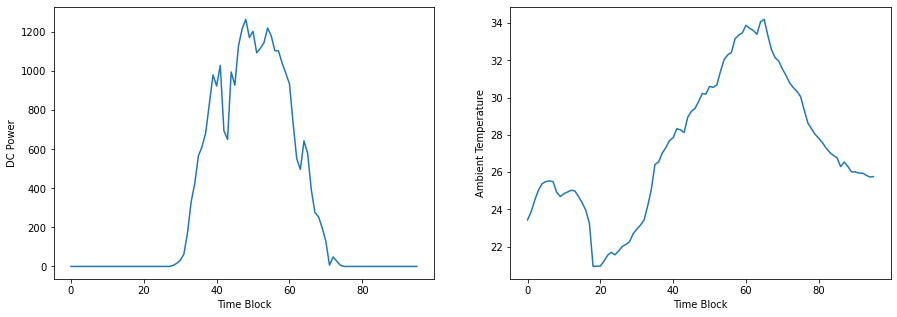

In [128]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['DC_POWER_1'])
ax2.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['AMBIENT_TEMPERATURE'])
ax1.set_xlabel('Time Block')
ax1.set_ylabel('DC Power')

ax2.set_xlabel('Time Block')
ax2.set_ylabel('Ambient Temperature')

plt.show()

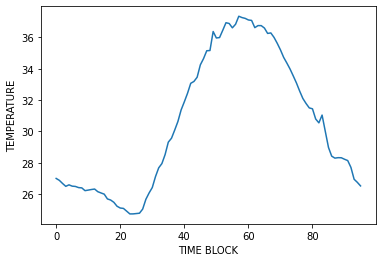

In [107]:
df_train['AMBIENT_TEMPERATURE'][0:96].plot()
plt.xlabel('TIME BLOCK')
plt.ylabel('TEMPERATURE')
plt.show()

In [97]:
print(list(df_train.isnull().sum()))

[0, 0, 0, 0, 0, 0, 64, 64, 64, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 64, 64, 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 904, 904, 904, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 904, 904, 904, 0, 0, 0]


In [231]:
## Columns having non-zero values during day-time only
day_only_columns = []
subcolumns = ['DC_POWER','AC_POWER','IRRADIATION']
for column in df_train.columns:
    if any(x in column for x in subcolumns):
        day_only_columns.append(column)

In [232]:
df_train.head()

BLOCK        DATE   TIME AMBIENT_TEMPERATURE MODULE_TEMPERATURE  \
0      1  2020-05-15  00:00             27.0048            25.0608   
1      2  2020-05-15  00:15             26.8808            24.4219   
2      3  2020-05-15  00:30             26.6821            24.4273   
3      4  2020-05-15  00:45             26.5006            24.4207   
4      5  2020-05-15  01:00             26.5961            25.0882   

  IRRADIATION  Inverter_No_1 DC_POWER_1 AC_POWER_1  Inverter_No_2  ...  \
0           0            1.0          0          0              2  ...   
1           0            1.0          0          0              2  ...   
2           0            1.0          0          0              2  ...   
3           0            1.0          0          0              2  ...   
4           0            1.0          0          0              2  ...   

  Inverter_No_20 DC_POWER_20  AC_POWER_20 Inverter_No_21 DC_POWER_21  \
0             20           0            0           21.0           0   
1             20           0            0           21.0           0   
2             20           0            0           21.0           0   
3             20           0            0           21.0           0   
4             20           0            0           21.0           0   

   AC_POWER_21 Inverter_No_22 DC_POWER_22  AC_POWER_22   TIME  
0            0             22           0            0  00:00  
1            0             22           0            0  00:15  
2            0             22           0            0  00:30  
3            0             22           0            0  00:45  
4            0             22           0            0  01:00  

[5 rows x 73 columns]

In [512]:
day_only_columns=list()
DC_cols = [i for i in df.columns if 'DC_POWER' in i]
AC_cols = [i for i in df.columns if 'AC_POWER' in i]
day_only_columns = DC_cols+AC_cols+["IRRADIATION"]


# Imputation 

In [132]:
def Data_Preparation_Plant_Level(df):
    for col in day_only_columns:
        df[col] = df[col].astype(float)
        # For time except for non-generating hours(12 am to 6 am & 6 pm to 12 am) will be replaced by zero
        df.loc[df[(~((df['BLOCK']>24) & (df['BLOCK']<73))) & df[col].isnull()].index,col] = 0

    # Left NaN value for generating hours(6 am to 6pm) 
       
        #1.AC & DC columns
    df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
       #2.Left NaN values in Irradiation, Ambient Temp, Module Temp, Inverter_No
    df.interpolate(method='linear',inplace=True)
    
    # Summing up Inverter wise AC and DC values to reach Plant-level generation
    df['AC_POWER'] = df.loc[: ,AC_cols].sum(axis=1)
    df['DC_POWER'] = df.loc[:,DC_cols].sum(axis=1)
    df['AC_POWER'] = df['AC_POWER']/1000
    df['DC_POWER'] = df['DC_POWER']/1000
    
    return df


In [134]:
df_train = Data_Preparation_Plant_Level(df_train)

<ipython-input-132-f56e74015f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-132-f56e74015f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<ipython-input-132-f56e74015f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-132-f56e74015f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<ipython-input-132-f56e74015f18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
<ipython-input-132-f56e74015f18>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear',inplace=True)
<ipython-input-132-f56e74015f18>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AC_POWER

In [135]:
df_train.isnull().sum()

BLOCK                  0
DATE                   0
TIME                   0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
                      ..
DC_POWER_22            0
AC_POWER_22            0
Inverter_No_22         0
AC_POWER               0
DC_POWER               0
Length: 74, dtype: int64

In [509]:
df_test = Data_Preparation_Plant_Level(df_test)

In [523]:
df_test = df_test[['BLOCK', 'DATE', 'TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']]


In [25]:
df_train.head()

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0      1  2020-05-15  00:00            27.004764           25.060789   
1      2  2020-05-15  00:15            26.880811           24.421869   
2      3  2020-05-15  00:30            26.682055           24.427290   
3      4  2020-05-15  00:45            26.500589           24.420678   
4      5  2020-05-15  01:00            26.596148           25.088210   

   IRRADIATION  Inverter_No_1  DC_POWER_1  AC_POWER_1  Inverter_No_2  ...  \
0          0.0            1.0         0.0         0.0              2  ...   
1          0.0            1.0         0.0         0.0              2  ...   
2          0.0            1.0         0.0         0.0              2  ...   
3          0.0            1.0         0.0         0.0              2  ...   
4          0.0            1.0         0.0         0.0              2  ...   

   DC_POWER_20  AC_POWER_20  Inverter_No_21  DC_POWER_21  AC_POWER_21  \
0          0.0          0.0            21.0          0.0          0.0   
1          0.0          0.0            21.0          0.0          0.0   
2          0.0          0.0            21.0          0.0          0.0   
3          0.0          0.0            21.0          0.0          0.0   
4          0.0          0.0            21.0          0.0          0.0   

   Inverter_No_22  DC_POWER_22  AC_POWER_22  AC_POWER  DC_POWER  
0              22          0.0          0.0       0.0       0.0  
1              22          0.0          0.0       0.0       0.0  
2              22          0.0          0.0       0.0       0.0  
3              22          0.0          0.0       0.0       0.0  
4              22          0.0          0.0       0.0       0.0  

[5 rows x 74 columns]

In [138]:
df_train = df_train[['BLOCK', 'DATE', 'TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER', 'DC_POWER']]

In [27]:
df_train['AMBIENT_TEMPERATURE'] = df_train['AMBIENT_TEMPERATURE'].astype(float)
df_train['MODULE_TEMPERATURE'] = df_train['MODULE_TEMPERATURE'].astype(float)

<ipython-input-27-ccaa1f3b6881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AMBIENT_TEMPERATURE'] = df_train['AMBIENT_TEMPERATURE'].astype(float)
<ipython-input-27-ccaa1f3b6881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MODULE_TEMPERATURE'] = df_train['MODULE_TEMPERATURE'].astype(float)


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2971 entries, 0 to 2970
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BLOCK                2971 non-null   int64  
 1   DATE                 2971 non-null   object 
 2   TIME                 2971 non-null   object 
 3   AMBIENT_TEMPERATURE  2971 non-null   float64
 4   MODULE_TEMPERATURE   2971 non-null   float64
 5   IRRADIATION          2971 non-null   float64
 6   AC_POWER             2971 non-null   float64
 7   DC_POWER             2971 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 288.9+ KB


In [29]:
df_train = df_train.loc[:,~df_train.columns.duplicated()]

In [142]:
df_test

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2971      1  2020-06-15  00:00            24.486876           23.846251   
2972      2  2020-06-15  00:15            24.509378           23.902851   
2973      3  2020-06-15  00:30            24.605338           24.172737   
2974      4  2020-06-15  00:45            24.679791           24.459142   
2975      5  2020-06-15  01:00            24.636373           24.380419   
...     ...         ...    ...                  ...                 ...   
3254     92  2020-06-17  22:45            23.511703           22.856201   
3255     93  2020-06-17  23:00            23.482282           22.744190   
3256     94  2020-06-17  23:15            23.354743           22.492245   
3257     95  2020-06-17  23:30            23.291048           22.373909   
3258     96  2020-06-17  23:45            23.202871           22.535908   

      IRRADIATION  AC_POWER  
2971          0.0       0.0  
2972          0.0       0.0  
2973          0.0       0.0  
2974          0.0       0.0  
2975          0.0       0.0  
...           ...       ...  
3254          0.0       0.0  
3255          0.0       0.0  
3256          0.0       0.0  
3257          0.0       0.0  
3258          0.0       0.0  

[288 rows x 7 columns]

In [32]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')


In [31]:
df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER', 'DC_POWER']].corr()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.842631     0.660469   
MODULE_TEMPERATURE              0.842631            1.000000     0.947146   
IRRADIATION                     0.660469            0.947146     1.000000   
AC_POWER                        0.651873            0.884677     0.923320   
DC_POWER                        0.652054            0.885174     0.923922   

                     AC_POWER  DC_POWER  
AMBIENT_TEMPERATURE  0.651873  0.652054  
MODULE_TEMPERATURE   0.884677  0.885174  
IRRADIATION          0.923320  0.923922  
AC_POWER             1.000000  0.999996  
DC_POWER             0.999996  1.000000

## Exploratory Data Analysis

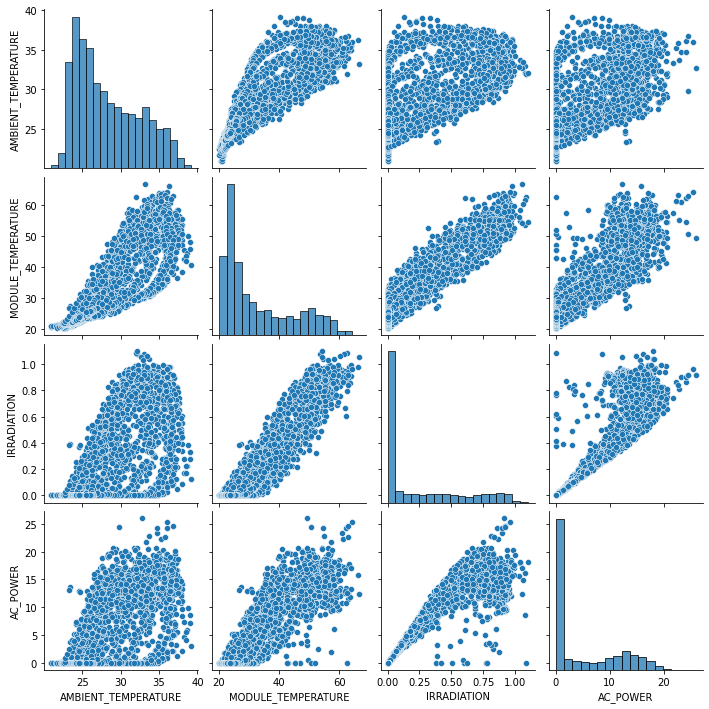

In [282]:
import seaborn as sns
sns.pairplot(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']],height=2.5)

Observations:

1.There seems to be high variation in Module Temperature with each degree rise in Ambient temperature

2.There are not much outliers

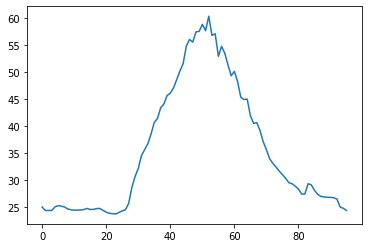

In [147]:
plt.plot(df_train['MODULE_TEMPERATURE'][0:96])

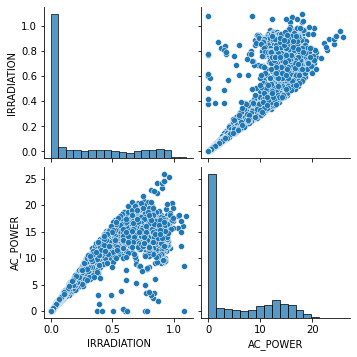

In [266]:
sns.pairplot(df_train[['IRRADIATION','AC_POWER']],height=2.5)

<AxesSubplot:xlabel='IRRADIATION'>

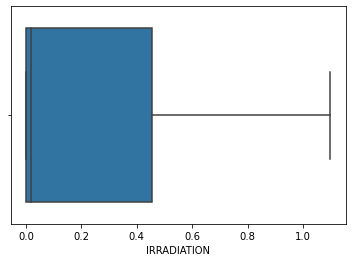

In [148]:
sns.boxplot(data=df_train,x='IRRADIATION')

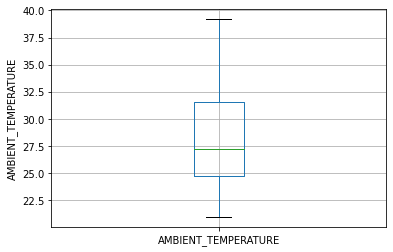

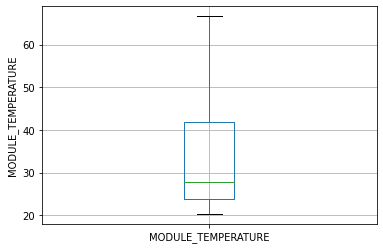

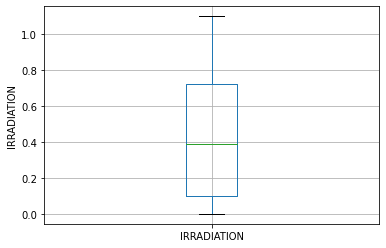

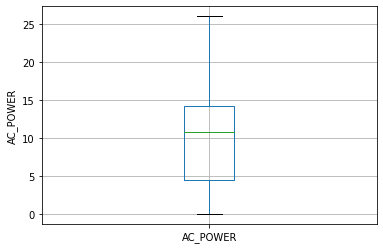

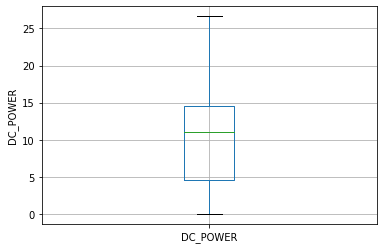

In [290]:
for feature in df_train.columns[3:]:
    # ignoring zero values for plotting
    df_train[df_train[feature]!=0].boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()



In [301]:
pd.set_option('display.max_row', None)
df_train

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0         1  2020-05-15  00:00            27.004764           25.060789   
1         2  2020-05-15  00:15            26.880811           24.421869   
2         3  2020-05-15  00:30            26.682055           24.427290   
3         4  2020-05-15  00:45            26.500589           24.420678   
4         5  2020-05-15  01:00            26.596148           25.088210   
5         6  2020-05-15  01:15            26.512740           25.317970   
6         7  2020-05-15  01:30            26.494339           25.217193   
7         8  2020-05-15  01:45            26.420410           25.065062   
8         9  2020-05-15  02:00            26.401946           24.691469   
9        10  2020-05-15  02:15            26.226078           24.559481   
10       11  2020-05-15  02:30            26.260399           24.482407   
11       12  2020-05-15  02:45            26.297826           24.488698   
12       13  2020-05-15  03:00            26.328249           24.506290   
13       14  2020-05-15  03:15            26.158710           24.595197   
14       15  2020-05-15  03:30            26.078499           24.801314   
15       16  2020-05-15  03:45            26.001304           24.607817   
16       17  2020-05-15  04:00            25.697211           24.626179   
17       18  2020-05-15  04:15            25.627702           24.773145   
18       19  2020-05-15  04:30            25.482046           24.796691   
19       20  2020-05-15  04:45            25.230932           24.436904   
20       21  2020-05-15  05:00            25.117599           24.104580   
21       22  2020-05-15  05:15            25.091862           23.897232   
22       23  2020-05-15  05:30            24.916968           23.839471   
23       24  2020-05-15  05:45            24.741274           23.786662   
24       25  2020-05-15  06:00            24.742787           24.077230   
25       26  2020-05-15  06:15            24.763911           24.356189   
26       27  2020-05-15  06:30            24.786323           24.548886   
27       28  2020-05-15  06:45            25.048245           25.746662   
28       29  2020-05-15  07:00            25.673202           28.674707   
29       30  2020-05-15  07:15            26.076818           30.725505   
30       31  2020-05-15  07:30            26.424239           32.206804   
31       32  2020-05-15  07:45            27.120288           34.591562   
32       33  2020-05-15  08:00            27.678970           35.705856   
33       34  2020-05-15  08:15            27.953492           36.786898   
34       35  2020-05-15  08:30            28.526215           38.617749   
35       36  2020-05-15  08:45            29.319021           40.738036   
36       37  2020-05-15  09:00            29.572044           41.471504   
37       38  2020-05-15  09:15            30.091407           43.465374   
38       39  2020-05-15  09:30            30.638658           44.145196   
39       40  2020-05-15  09:45            31.375120           45.719524   
40       41  2020-05-15  10:00            31.892094           46.131174   
41       42  2020-05-15  10:15            32.437480           47.143508   
42       43  2020-05-15  10:30            33.074135           48.680290   
43       44  2020-05-15  10:45            33.192470           50.249560   
44       45  2020-05-15  11:00            33.462057           51.610991   
45       46  2020-05-15  11:15            34.251795           54.894302   
46       47  2020-05-15  11:30            34.651455           56.083953   
47       48  2020-05-15  11:45            35.151526           55.593795   
48       49  2020-05-15  12:00            35.166105           57.488241   
49       50  2020-05-15  12:15            36.377571           57.588582   
50       51  2020-05-15  12:30            35.966358           58.888153   
51       52  2020-05-15  12:45            35.992946           57.729486   
52       53  2020-05-15  13:00 

In [144]:
df_gen

DATE_TIME  DC_POWER  AC_POWER  Inverter_No
0      2020-05-15 00:00:00       0.0       0.0            1
1      2020-05-15 00:00:00       0.0       0.0            2
2      2020-05-15 00:00:00       0.0       0.0            3
3      2020-05-15 00:00:00       0.0       0.0            4
4      2020-05-15 00:00:00       0.0       0.0            5
...                    ...       ...       ...          ...
67693  2020-06-17 23:45:00       0.0       0.0           18
67694  2020-06-17 23:45:00       0.0       0.0           19
67695  2020-06-17 23:45:00       0.0       0.0           20
67696  2020-06-17 23:45:00       0.0       0.0           21
67697  2020-06-17 23:45:00       0.0       0.0           22

[67698 rows x 4 columns]

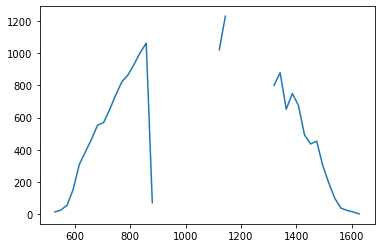

In [470]:
df2 = df_gen.copy() ## Making a acopy
df2['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date.astype(str)
## Selecting a date and replacing AC Power with NaN wherever its 0 and plotting 
indexes = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')&(df2['AC_POWER']==0)].index
df2.loc[indexes,'AC_POWER']=np.nan
df2 = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['AC_POWER']
df2.plot();

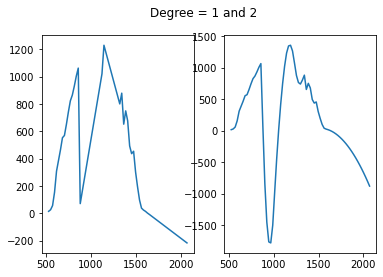

In [471]:
## Comparison between 1 & 2 degree splines
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Degree = 1 and 2')
ax1.plot(df2.interpolate(method='spline',order=1))
ax2.plot(df2.interpolate(method='spline',order=2));


<AxesSubplot:>

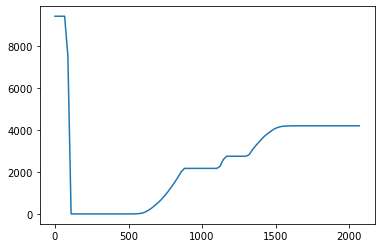

In [375]:
df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['DAILY_YIELD'].plot()

<AxesSubplot:>

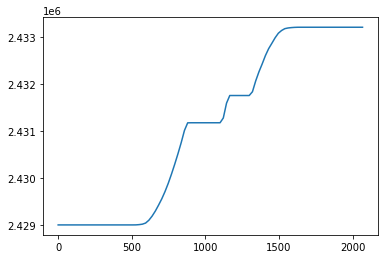

In [376]:
df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['TOTAL_YIELD'].plot()

Summing up DC and AC values of all inverters

1.Excluding the Daily Yield column as it is just the sum of generation over the whole day.

2.Taking the aggregated AC and DC Power of all the inverters as individual inverter wise values are not required. 

#### Finding Correlation

In [303]:
df_train.iloc[:,1:].corr()


AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.842631     0.660469   
MODULE_TEMPERATURE              0.842631            1.000000     0.947146   
IRRADIATION                     0.660469            0.947146     1.000000   
AC_POWER                        0.651873            0.884677     0.923320   
DC_POWER                        0.652054            0.885174     0.923922   

                     AC_POWER  DC_POWER  
AMBIENT_TEMPERATURE  0.651873  0.652054  
MODULE_TEMPERATURE   0.884677  0.885174  
IRRADIATION          0.923320  0.923922  
AC_POWER             1.000000  0.999996  
DC_POWER             0.999996  1.000000

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.842631     0.660469   
MODULE_TEMPERATURE              0.842631            1.000000     0.947146   
IRRADIATION                     0.660469            0.947146     1.000000   
AC_POWER                        0.651873            0.884677     0.923320   
DC_POWER                        0.652054            0.885174     0.923922   

                     AC_POWER  DC_POWER  
AMBIENT_TEMPERATURE  0.651873  0.652054  
MODULE_TEMPERATURE   0.884677  0.885174  
IRRADIATION          0.923320  0.923922  
AC_POWER             1.000000  0.999996  
DC_POWER             0.999996  1.000000

<AxesSubplot:>

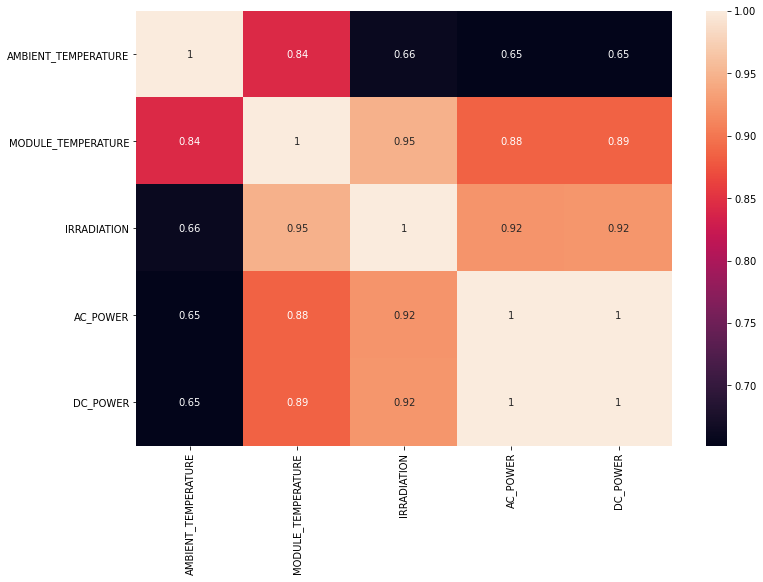

In [150]:
display(df_train.iloc[:,1:].corr())
plt.figure(figsize = (12,8))
sns.heatmap(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'AC_POWER', 'DC_POWER']].corr(),annot=True)

In [306]:
dfs = df_train.copy()

Observations
1. Features are highly correlated. 
2. As expected, AC and DC Power fully corelated, so one can be dropped.
3. Dependent variables- DC/AC power are v.highly correlated with Irradiation

In [307]:
df_train.drop('DC_POWER',axis=1,inplace=True)

In [308]:
df_train[df_train['AC_POWER']!=0]

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
24       25  2020-05-15  06:00            24.742787           24.077230   
25       26  2020-05-15  06:15            24.763911           24.356189   
26       27  2020-05-15  06:30            24.786323           24.548886   
27       28  2020-05-15  06:45            25.048245           25.746662   
28       29  2020-05-15  07:00            25.673202           28.674707   
29       30  2020-05-15  07:15            26.076818           30.725505   
30       31  2020-05-15  07:30            26.424239           32.206804   
31       32  2020-05-15  07:45            27.120288           34.591562   
32       33  2020-05-15  08:00            27.678970           35.705856   
33       34  2020-05-15  08:15            27.953492           36.786898   
34       35  2020-05-15  08:30            28.526215           38.617749   
35       36  2020-05-15  08:45            29.319021           40.738036   
36       37  2020-05-15  09:00            29.572044           41.471504   
37       38  2020-05-15  09:15            30.091407           43.465374   
38       39  2020-05-15  09:30            30.638658           44.145196   
39       40  2020-05-15  09:45            31.375120           45.719524   
40       41  2020-05-15  10:00            31.892094           46.131174   
41       42  2020-05-15  10:15            32.437480           47.143508   
42       43  2020-05-15  10:30            33.074135           48.680290   
43       44  2020-05-15  10:45            33.192470           50.249560   
44       45  2020-05-15  11:00            33.462057           51.610991   
45       46  2020-05-15  11:15            34.251795           54.894302   
46       47  2020-05-15  11:30            34.651455           56.083953   
47       48  2020-05-15  11:45            35.151526           55.593795   
48       49  2020-05-15  12:00            35.166105           57.488241   
49       50  2020-05-15  12:15            36.377571           57.588582   
50       51  2020-05-15  12:30            35.966358           58.888153   
51       52  2020-05-15  12:45            35.992946           57.729486   
52       53  2020-05-15  13:00            36.458581           60.389377   
53       54  2020-05-15  13:15            36.939564           56.859504   
54       55  2020-05-15  13:30            36.890793           57.148673   
55       56  2020-05-15  13:45            36.614378           52.980611   
56       57  2020-05-15  14:00            36.842766           54.810005   
57       58  2020-05-15  14:15            37.352829           53.538947   
58       59  2020-05-15  14:30            37.268466           51.358931   
59       60  2020-05-15  14:45            37.216598           49.365876   
60       61  2020-05-15  15:00            37.115580           50.190043   
61       62  2020-05-15  15:15            37.086618           48.284412   
62       63  2020-05-15  15:30            36.626163           45.371701   
63       64  2020-05-15  15:45            36.755735           44.975190   
64       65  2020-05-15  16:00            36.754658           45.037738   
65       66  2020-05-15  16:15            36.599552           41.947110   
66       67  2020-05-15  16:30            36.257382           40.564847   
67       68  2020-05-15  16:45            36.287953           40.679581   
68       69  2020-05-15  17:00            36.002837           39.219847   
69       70  2020-05-15  17:15            35.627338           37.134267   
70       71  2020-05-15  17:30            35.209574           35.678953   
71       72  2020-05-15  17:45            34.731652           34.005621   
72       73  2020-05-15  18:00            34.367762           33.148010   
73       74  2020-05-15  18:15            33.985284           32.473627   
74       75  2020-05-15  18:30            33.545850           31.703619   
119      25  2020-05-16  06:00            24.044605           22.218803   
120      26  2020-05-16  06:15 

## Outlier Detection

In [154]:
df_train.drop('DC_POWER',axis=1,inplace=True)
percentile_dict = {}
for i in df_train.columns[3:]:
    a_list = []
    for j in [1,10,25,50,75,90,99,100]:
        a_list.append(round(np.percentile(df_train[i],j),2))
    percentile_dict[i] = a_list    
pd.DataFrame(pd.concat([pd.DataFrame({'Percentiles':[1,10,25,50,75,90,99,100]}),pd.DataFrame(percentile_dict)],axis=1))        
    

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Percentiles  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  AC_POWER
0            1                22.55               21.10         0.00      0.00
1           10                23.66               22.40         0.00      0.00
2           25                24.73               23.76         0.00      0.00
3           50                27.24               27.79         0.02      0.46
4           75                31.55               41.75         0.46     11.23
5           90                34.61               52.28         0.80     15.28
6           99                37.40               60.32         0.96     19.54
7          100                39.18               66.64         1.10     25.98

## Imputing outliers 

There are no extreme outliers.

We will just replace the values beyond 99 percentile with 99th percentile value and below 1 percentile with the 1st percentile.

Let's make a dictionary of 99th percentile values for treating the test data.

In [152]:
outlier_imputer_dict = {}

for var in df_train.columns[3:]:
    percentile_dict = {}
    
    NinetyNine_percentile = np.percentile(df_train[var],99)  
       
    First_percentile = np.percentile(df_train[var],1)

    percentile_dict['99th'] =  NinetyNine_percentile
    percentile_dict['1st'] =  First_percentile  
    # Saving as dictionary for each column
    outlier_imputer_dict[var] = percentile_dict
      
#Saving the final dictionary         
np.save('outlier_imputer_dict',outlier_imputer_dict)    
            


In [513]:
def outlier_imputer(df):
    #Loading Outlier Imputer dictionary
    outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()
    
    for var in df.columns[3:]:
        
        df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']  
       
        df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st']
    
    return df

In [518]:
outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()

In [ ]:
print(outlier_dict)

In [143]:
df_test2 = df_test.copy()

In [285]:
df_test =pd.read_csv('df_test.csv',index_col=0)

In [524]:
df_train = outlier_imputer(df_train)
df_test = outlier_imputer(df_test)

In [525]:
df_test


BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2971      1  2020-06-15  00:00            24.486876           23.846251   
2972      2  2020-06-15  00:15            24.509378           23.902851   
2973      3  2020-06-15  00:30            24.605338           24.172737   
2974      4  2020-06-15  00:45            24.679791           24.459142   
2975      5  2020-06-15  01:00            24.636373           24.380419   
...     ...         ...    ...                  ...                 ...   
3254     92  2020-06-17  22:45            23.511703           22.856201   
3255     93  2020-06-17  23:00            23.482282           22.744190   
3256     94  2020-06-17  23:15            23.354743           22.492245   
3257     95  2020-06-17  23:30            23.291048           22.373909   
3258     96  2020-06-17  23:45            23.202871           22.535908   

      IRRADIATION  AC_POWER  
2971          0.0       0.0  
2972          0.0       0.0  
2973          0.0       0.0  
2974          0.0       0.0  
2975          0.0       0.0  
...           ...       ...  
3254          0.0       0.0  
3255          0.0       0.0  
3256          0.0       0.0  
3257          0.0       0.0  
3258          0.0       0.0  

[288 rows x 7 columns]

In [159]:
for key, values in outlier_imputer_dict.items():
    print(key, values)

AMBIENT_TEMPERATURE {'99th': 37.39861080172413, '1st': 22.546186481034486}
MODULE_TEMPERATURE {'99th': 60.32299286206897, '1st': 21.099540196666666}
IRRADIATION {'99th': 0.9607427385333338, '1st': 0.0}
AC_POWER {'99th': 19.544968952380955, '1st': 0.0}
DC_POWER {'99th': 19.993737333333335, '1st': 0.0}


Let's check relations using Scatterplots

In [161]:
import plotly.express as px  
fig = px.scatter(df_train[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']],x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',title='AMBIENT TEMPERATURE vs MODULE TEMPERATURE')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

There seems to be high variation in Module Temperature wrt the Ambient temperature
For Ambient temperature at 27^C, Module temperature is varying from 24-57^C. This indicates the influence of cooling factors like wind, humidity on the module temperature.


In [66]:
df_train.columns

Index(['BLOCK', 'DATE', 'TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'AC_POWER', 'DC_POWER'],
      dtype='object')

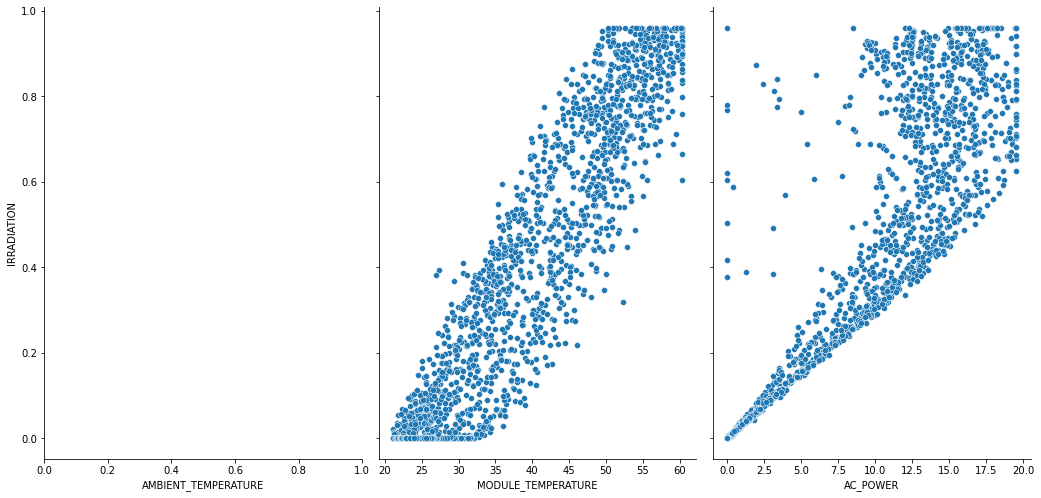

In [60]:
## visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_train, x_vars=['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','AC_POWER'],
             y_vars='IRRADIATION', height=7, aspect=0.7)


In [62]:
df_train[(df_train['IRRADIATION']>0.9)&(df_train['AC_POWER']<15)]

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
521      44  2020-05-20  10:45            30.049282           48.909878   
523      46  2020-05-20  11:15            30.529789           49.119193   
524      47  2020-05-20  11:30            31.045927           51.212736   
527      50  2020-05-20  12:15            31.916930           52.511633   
528      51  2020-05-20  12:30            32.014410           52.175984   
...     ...         ...    ...                  ...                 ...   
2253     51  2020-06-07  12:30            33.394238           60.120682   
2441     47  2020-06-09  11:30            33.002392           58.085779   
2535     45  2020-06-10  11:00            30.957829           51.643698   
2539     49  2020-06-10  12:00            32.280093           53.316763   
2927     53  2020-06-14  13:00            32.306682           52.985789   

      IRRADIATION   AC_POWER   DC_POWER  
521      0.912170   9.471633   9.703826  
523      0.900284  10.062503  10.308768  
524      0.904426  10.374010  10.627708  
527      0.923458  13.113843  13.436213  
528      0.902384  12.859686  13.174932  
...           ...        ...        ...  
2253     0.960743  14.942855  15.318984  
2441     0.941356  14.041593  14.391127  
2535     0.920785  12.272881  12.580213  
2539     0.953999  14.722327  15.082774  
2927     0.902952  13.791482  14.139169  

[71 rows x 8 columns]

In [ ]:
fig = px.scatter(df_train,y='IRRADIATION',x='AC_POWER',title=' IRRADIATION vs AC POWER ')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

This strong linear relation shows clearly that the Irradiation is the most useful feature for Solar power generation.

In [163]:
fig = px.scatter(df_train[['AMBIENT_TEMPERATURE','IRRADIATION']],x='AMBIENT_TEMPERATURE',y='IRRADIATION',title='AMBIENT TEMPERATURE VS IRRADIATION ')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

No doubt, Irradiation and Ambient Temperature are correlated but high variance in temperature for each unit of Irradiation implies the influence of other factors too on the temperature.

Factors like wind speed, wind direction, humidity can also be useful for predicting generation.

In [75]:
df_train.to_csv('df_train_final.csv')

## Import Data 

In [ ]:
pip install autoviz

Shape of your Data Set: (2971, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 15


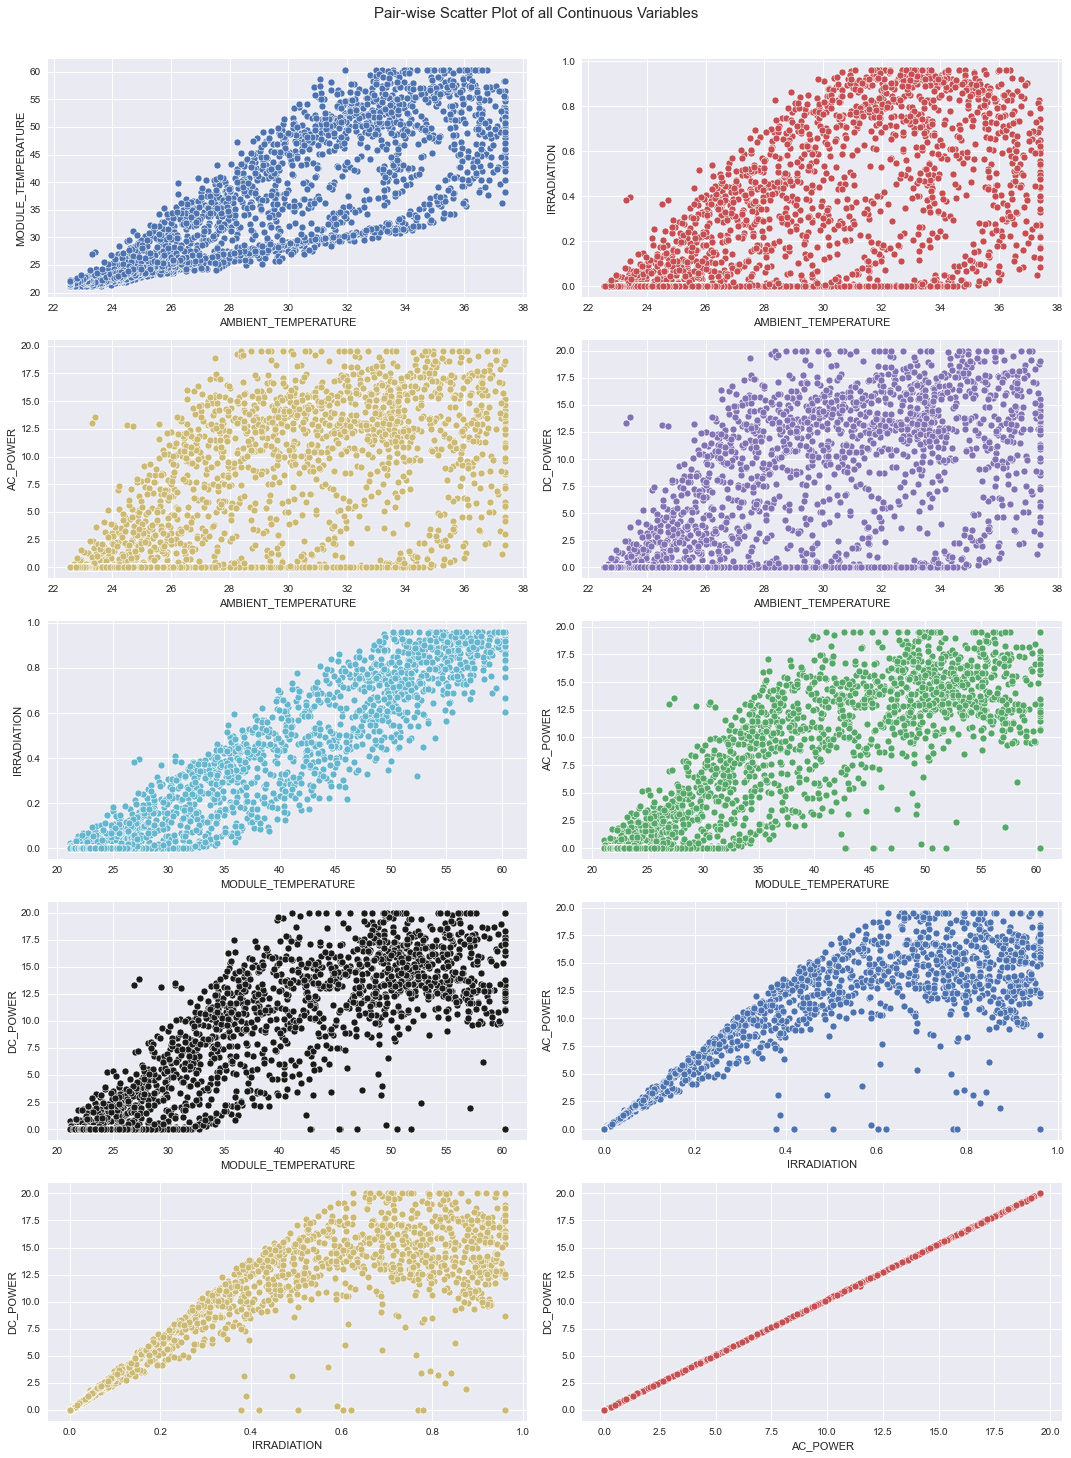

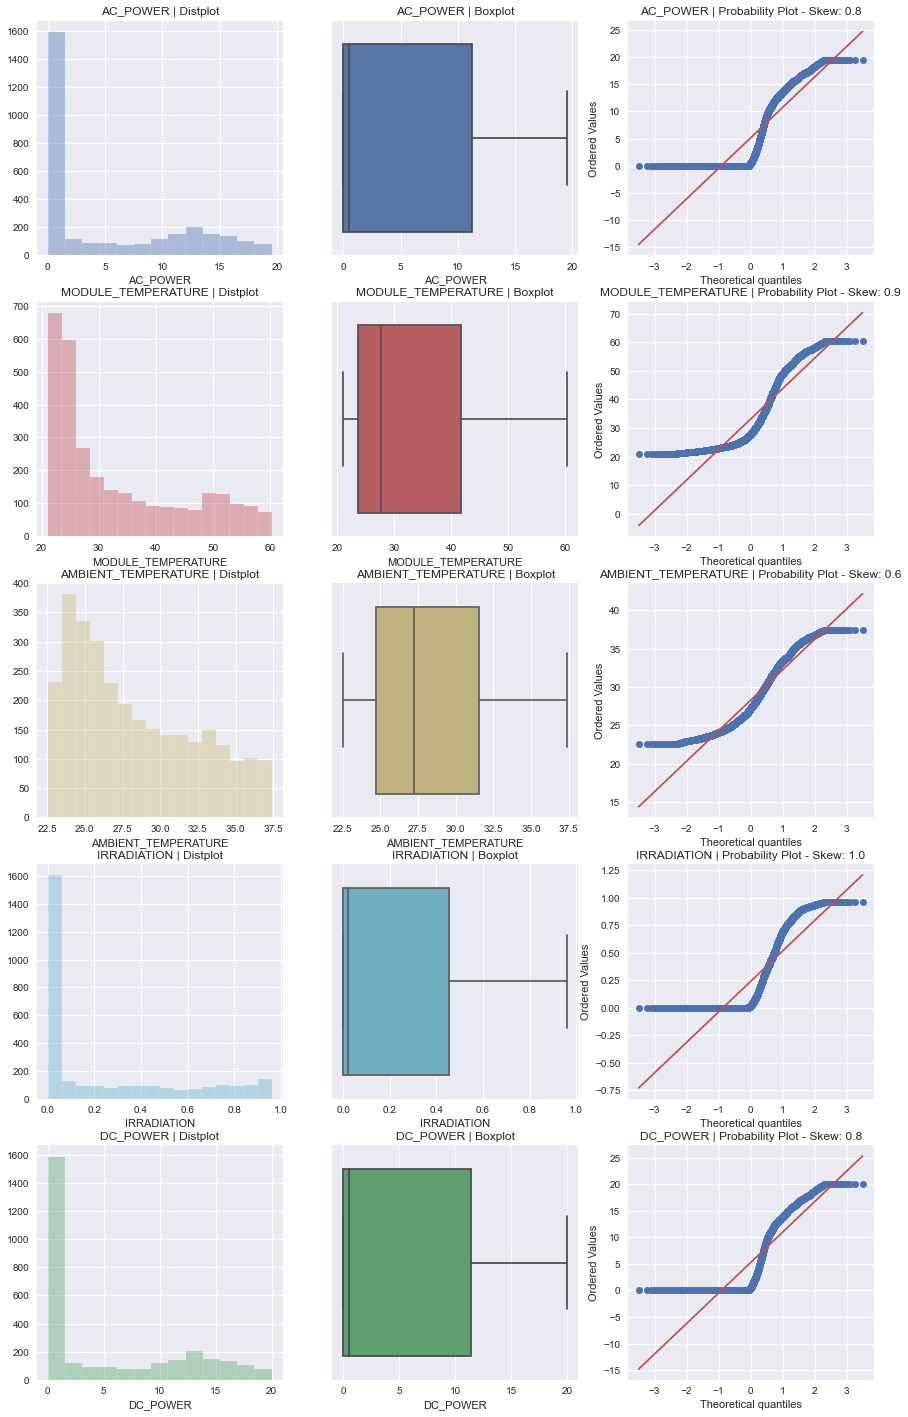

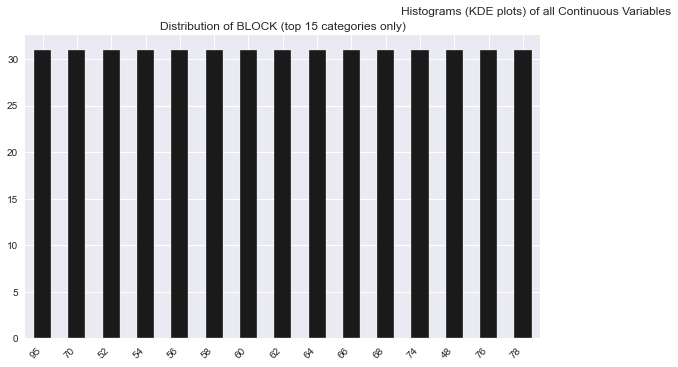

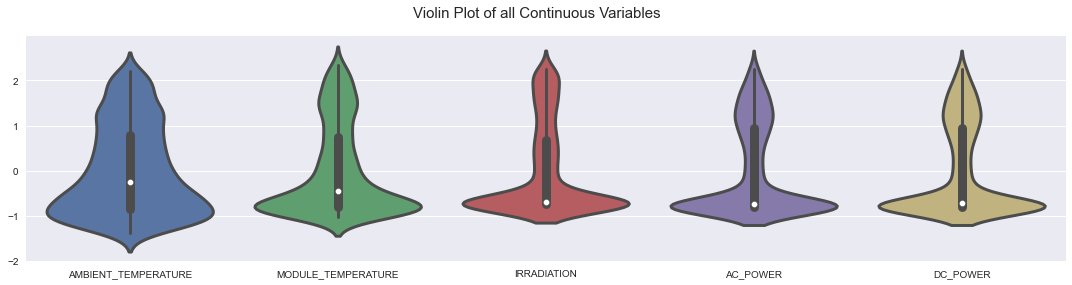

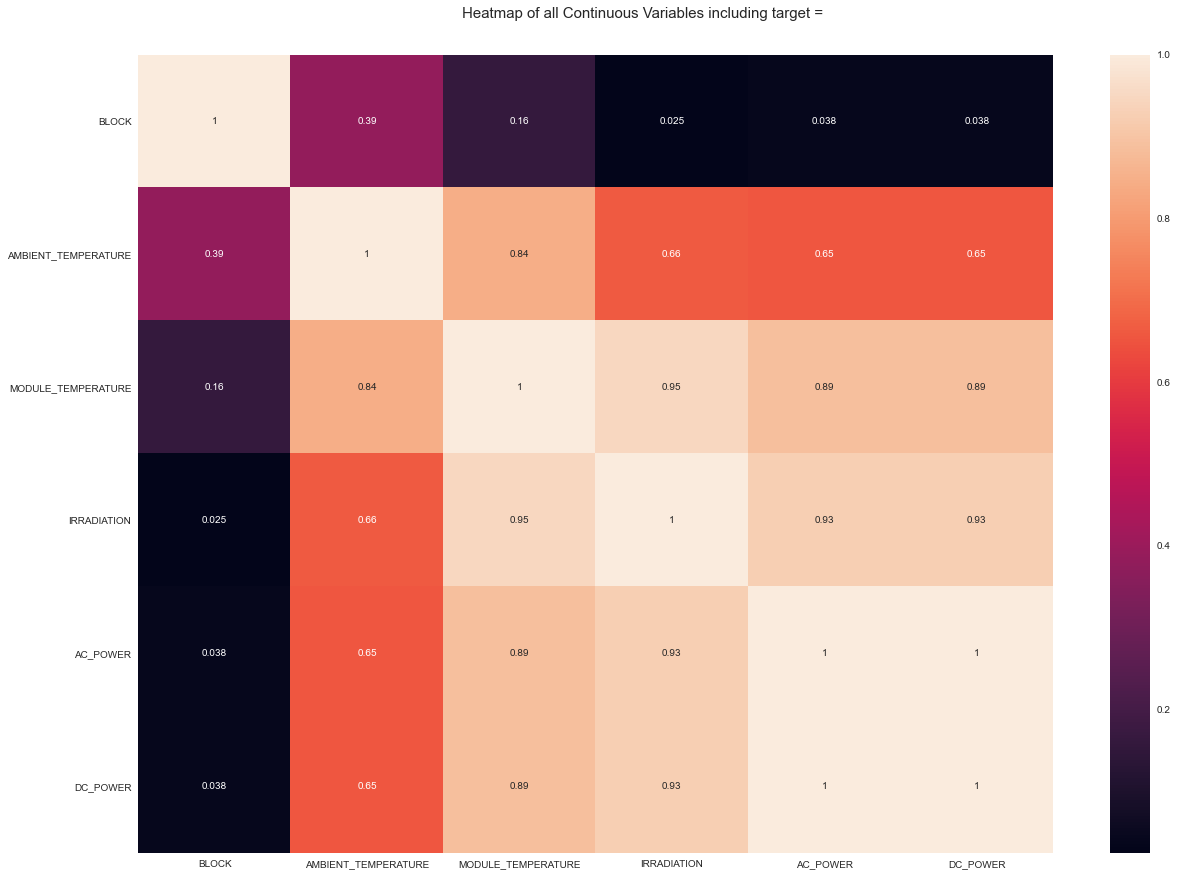

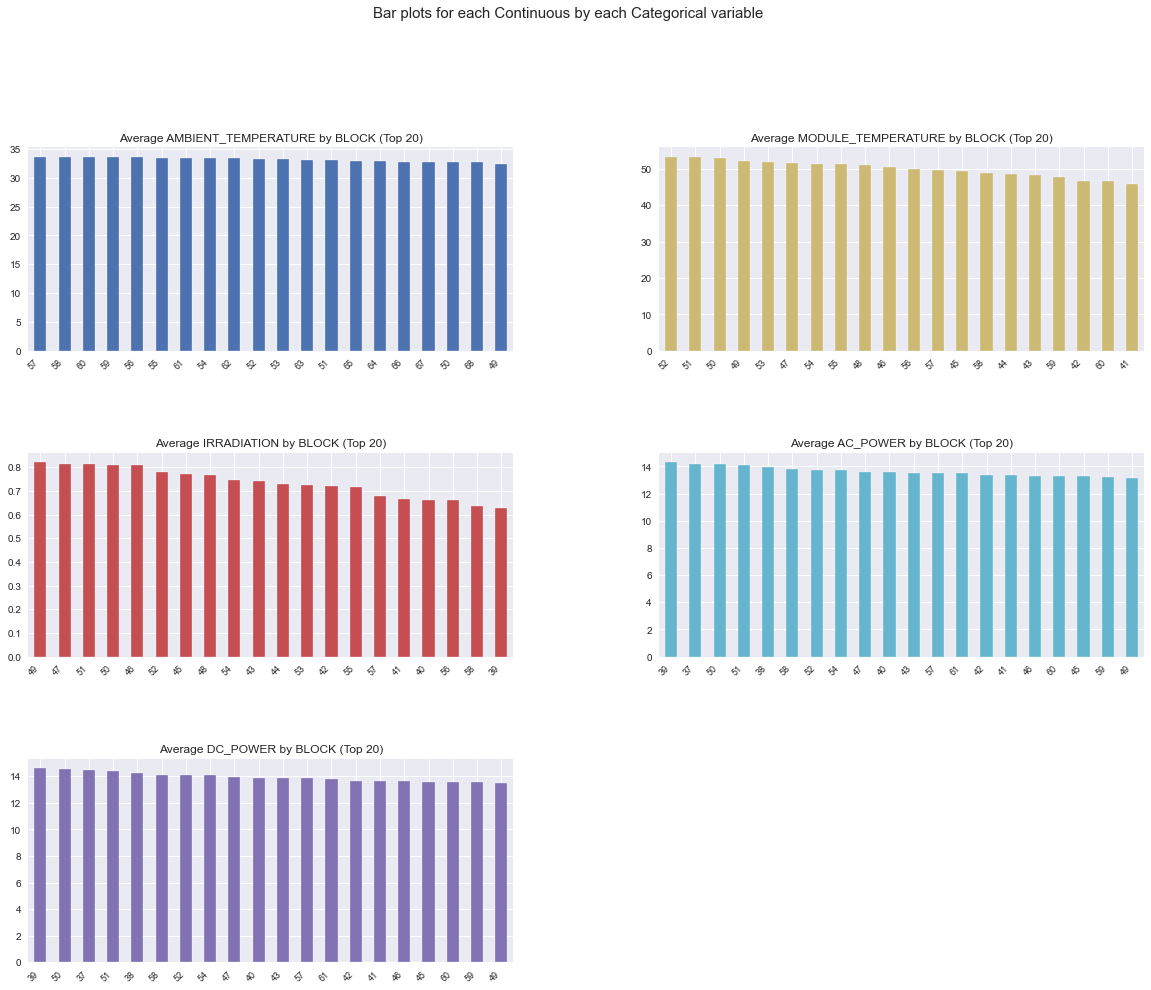

Time to run AutoViz (in seconds) = 30.053

 ###################### VISUALIZATION Completed ########################


In [76]:

from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()
auto = AV.AutoViz('df_train_final.csv')

# Model Building

In [77]:
## Splitting df_train  

x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y_train = df_train[['AC_POWER']]


In [80]:
y_train

AC_POWER
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
2966       0.0
2967       0.0
2968       0.0
2969       0.0
2970       0.0

[2971 rows x 1 columns]

In [156]:
df_test

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2971      1  2020-06-15  00:00            24.486876           23.846251   
2972      2  2020-06-15  00:15            24.509378           23.902851   
2973      3  2020-06-15  00:30            24.605338           24.172737   
2974      4  2020-06-15  00:45            24.679791           24.459142   
2975      5  2020-06-15  01:00            24.636373           24.380419   
...     ...         ...    ...                  ...                 ...   
3254     92  2020-06-17  22:45            23.511703           22.856201   
3255     93  2020-06-17  23:00            23.482282           22.744190   
3256     94  2020-06-17  23:15            23.354743           22.492245   
3257     95  2020-06-17  23:30            23.291048           22.373909   
3258     96  2020-06-17  23:45            23.202871           22.535908   

      IRRADIATION  AC_POWER  
2971          0.0       0.0  
2972          0.0       0.0  
2973          0.0       0.0  
2974          0.0       0.0  
2975          0.0       0.0  
...           ...       ...  
3254          0.0       0.0  
3255          0.0       0.0  
3256          0.0       0.0  
3257          0.0       0.0  
3258          0.0       0.0  

[288 rows x 7 columns]

In [117]:
for fold,(train_indices, valid_indices) in enumerate(kf.split(X=df_train)):
    print(train_indices.shape,valid_indices.shape)

(2673,) (298,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)
(2674,) (297,)


In [252]:

#No. of bins
cut_blocks = [1,2,3,4,5,6,7,8]
#Bins range
cut_bins =[0, 12, 24, 36, 48, 60, 72, 84, 96]
#Assigning each row to a bin based on BLOCKS
df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)
display(df_train)

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0         1  2020-05-15  00:00            27.004764           25.060789   
1         2  2020-05-15  00:15            26.880811           24.421869   
2         3  2020-05-15  00:30            26.682055           24.427290   
3         4  2020-05-15  00:45            26.500589           24.420678   
4         5  2020-05-15  01:00            26.596148           25.088210   
...     ...         ...    ...                  ...                 ...   
2966     92  2020-06-14  22:45            24.185657           22.922953   
2967     93  2020-06-14  23:00            24.412542           23.356136   
2968     94  2020-06-14  23:15            24.652915           23.913763   
2969     95  2020-06-14  23:30            24.702391           24.185130   
2970     96  2020-06-14  23:45            24.534757           23.921971   

      IRRADIATION  AC_POWER BIN  
0             0.0       0.0   1  
1             0.0       0.0   1  
2             0.0       0.0   1  
3             0.0       0.0   1  
4             0.0       0.0   1  
...           ...       ...  ..  
2966          0.0       0.0   8  
2967          0.0       0.0   8  
2968          0.0       0.0   8  
2969          0.0       0.0   8  
2970          0.0       0.0   8  

[2971 rows x 8 columns]

In [251]:
df_train.drop('kfold',axis=1,inplace=True)

In [134]:
df_ = df_train.copy()

In [243]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

def ANN_model():
    # 3 layered Neural network with 500 epochs and 4 batch size
    reg = Sequential()
    reg.add(Dense(16, input_dim = 3, activation = 'relu'))
    reg.add(Dense(8,kernel_initializer='normal', activation = 'relu'))
    reg.add(Dense(1))
    reg.compile(loss='mean_squared_error', optimizer='adam')
    return reg

ann_regressor = KerasRegressor(build_fn=ANN_model, nb_epoch=500, batch_size=4, verbose=False)

In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

## Pipeline for different Regression models 
pipeline_lr = Pipeline([('lin_regression',LinearRegression())])
pipeline_dt = Pipeline([('dt_regression',DecisionTreeRegressor(random_state=0))])
pipeline_rf = Pipeline([('rf_regression',RandomForestRegressor(random_state=0))])
pipeline_ridge = Pipeline([('ridge_regression',Ridge(random_state=0))])
pipeline_lasso = Pipeline([('lasso_regression',Lasso(random_state=0))])
pipeline_xgboost = Pipeline([('xgboost_regression',XGBRegressor())])
pipeline_ann = Pipeline([('ann_regressor',ann_regressor)])

## Making the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_ridge, pipeline_lasso, pipeline_xgboost, pipeline_ann]

best_rmse = 100.0
best_regressor = 0
best_pipeline = ""

## Dictionary of Pipelines and Regressor types for ease of reference
pipe_dict = {0:'Linear Regression',1: 'Decision Tree Regressor',2:'Random Forest Regressor',
             3:'Ridge Regressor',4:'Lasso Regressor',5:'XG Boost Regressor',6:'ANN Regressor'}

In [253]:
import warnings
warnings.filterwarnings("ignore")

# features to be used for training
useful_features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

from sklearn.model_selection import StratifiedKFold
# Splitting data into 8 folds 
skf = StratifiedKFold(n_splits=8, random_state=23, shuffle=True)
#Initializing kfold column
df_train['kfold'] = -1

# each row shall be assigned a fold no.based on 8 bins so that each fold will have equal representation of each bin
for fold,(train_indices, valid_indices) in enumerate(skf.split(X=df_train.iloc[:,:-1], y=df_train['BIN'])):
    df_train.loc[valid_indices, 'kfold'] = fold 

# Will iterate through all the Pipelines one by one
for j, model in enumerate(pipelines):
    
    RMSE = list()
    for i in range(8):    
        xtrain = df_train[df_train['kfold'] != i]
        xvalid = df_train[df_train['kfold'] == i]

        ytrain = xtrain.AC_POWER
        yvalid = xvalid.AC_POWER

        xtrain = xtrain[useful_features]
        xvalid = xvalid[useful_features]
        
        scaler = StandardScaler()
        scaler.fit_transform(xtrain)
        scaler.transform(xvalid)
        
        model.fit(xtrain, ytrain)
        rmse = np.sqrt(mean_squared_error(yvalid, model.predict(xvalid)))
        RMSE.append(rmse)
        
    # Mean of RMSE for all iterations for each model
    folds_mean_rmse = np.mean(RMSE)
    
    print('Mean Validation RMSE for {}: {}'.format(pipe_dict[j], folds_mean_rmse))
        
   # If mean of RMSE for all iterations reduces, call that model as the best & keep repeating 
    # to get the best model
    if folds_mean_rmse < best_rmse:
        best_rmse = folds_mean_rmse
        best_pipeline = model
        best_regressor = j

print('\n\nRegressor with least RMSE:  {}'.format(pipe_dict[best_regressor]))
print(best_pipeline)

Mean Validation RMSE for Linear Regression: 2.3738425616651613
Mean Validation RMSE for Decision Tree Regressor: 2.3598920923506563
Mean Validation RMSE for Random Forest Regressor: 1.7386875230088275
Mean Validation RMSE for Ridge Regressor: 2.3774000818909666
Mean Validation RMSE for Lasso Regressor: 2.792532888972481
Mean Validation RMSE for XG Boost Regressor: 1.8680211963786664
Mean Validation RMSE for ANN Regressor: 3.376760114293983


Regressor with least RMSE:  Random Forest Regressor
Pipeline(steps=[('rf_regression', RandomForestRegressor(random_state=0))])


In [170]:
xtrain.shape,xvalid.shape

((2599, 3), (372, 3))

In [114]:
df_train.to_csv('df_train_kfolds.csv')

## Pipeline

In [194]:
df_test

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2971      1  2020-06-15  00:00            24.486876           23.846251   
2972      2  2020-06-15  00:15            24.509378           23.902851   
2973      3  2020-06-15  00:30            24.605338           24.172737   
2974      4  2020-06-15  00:45            24.679791           24.459142   
2975      5  2020-06-15  01:00            24.636373           24.380419   
...     ...         ...    ...                  ...                 ...   
3254     92  2020-06-17  22:45            23.511703           22.856201   
3255     93  2020-06-17  23:00            23.482282           22.744190   
3256     94  2020-06-17  23:15            23.354743           22.492245   
3257     95  2020-06-17  23:30            23.291048           22.373909   
3258     96  2020-06-17  23:45            23.202871           22.535908   

      IRRADIATION  AC_POWER  
2971          0.0       0.0  
2972          0.0       0.0  
2973          0.0       0.0  
2974          0.0       0.0  
2975          0.0       0.0  
...           ...       ...  
3254          0.0       0.0  
3255          0.0       0.0  
3256          0.0       0.0  
3257          0.0       0.0  
3258          0.0       0.0  

[288 rows x 7 columns]

## Hyperparameter Tuning using Randomized Search

In [260]:
#Splitting train into x & y
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_train = df_train[['AC_POWER']]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train, y_train)

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=100, verbose=2)

In [269]:
print(rf_randomcv.best_params_)


{'n_estimators': 1100, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse'}


In [503]:
df_test_final

BLOCK        DATE   TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2971      1  15-06-2020   0:00            24.486876           23.846251   
2972      2  15-06-2020   0:15            24.509378           23.902851   
2973      3  15-06-2020   0:30            24.605338           24.172737   
2974      4  15-06-2020   0:45            24.679791           24.459142   
2975      5  15-06-2020   1:00            24.636373           24.380419   
...     ...         ...    ...                  ...                 ...   
3254     92  17-06-2020  22:45            23.511703           22.856201   
3255     93  17-06-2020  23:00            23.482282           22.744190   
3256     94  17-06-2020  23:15            23.354743           22.492245   
3257     95  17-06-2020  23:30            23.291048           22.373909   
3258     96  17-06-2020  23:45            23.202871           22.535908   

      IRRADIATION  AC_POWER  
2971          0.0       0.0  
2972          0.0       0.0  
2973          0.0       0.0  
2974          0.0       0.0  
2975          0.0       0.0  
...           ...       ...  
3254          0.0       0.0  
3255          0.0       0.0  
3256          0.0       0.0  
3257          0.0       0.0  
3258          0.0       0.0  

[288 rows x 7 columns]

In [279]:
rf_model = RandomForestRegressor(n_estimators= 1100, min_samples_split= 14, min_samples_leaf= 8, 
                                max_features= 'auto', max_depth= 10, criterion= 'mse')
# Fitting on train
rf_model.fit(x_train, y_train)


In [256]:
S

{'n_estimators': [100, 500, 900, 1100, 1500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [494]:
df_test.columns = ['BLOCK', 'DATE', 'TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']

## Predictions on Test data 

In [628]:
#Splitting into x & y
x_test = df_test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_test = df_test[['AC_POWER']]

#Predicting for x_test
y_pred_rf = rf_model.predict(x_test)

print(f'Root Mean Squared Error for Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}')


Root Mean Squared Error for Test Data: 1.86830155234851


In [648]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf.columns=['AC_Prediction']

actual_vs_pred = pd.concat([y_pred_rf,y_test.reset_index(drop=True)],axis=1)
actual_vs_pred.columns = ['Prediction(MW)','Actual(MW)']

In [638]:
actual_vs_pred

Prediction(MW)  Actual(MW)
0               0.0         0.0
1               0.0         0.0
2               0.0         0.0
3               0.0         0.0
4               0.0         0.0
..              ...         ...
283             0.0         0.0
284             0.0         0.0
285             0.0         0.0
286             0.0         0.0
287             0.0         0.0

[288 rows x 2 columns]

<AxesSubplot:>

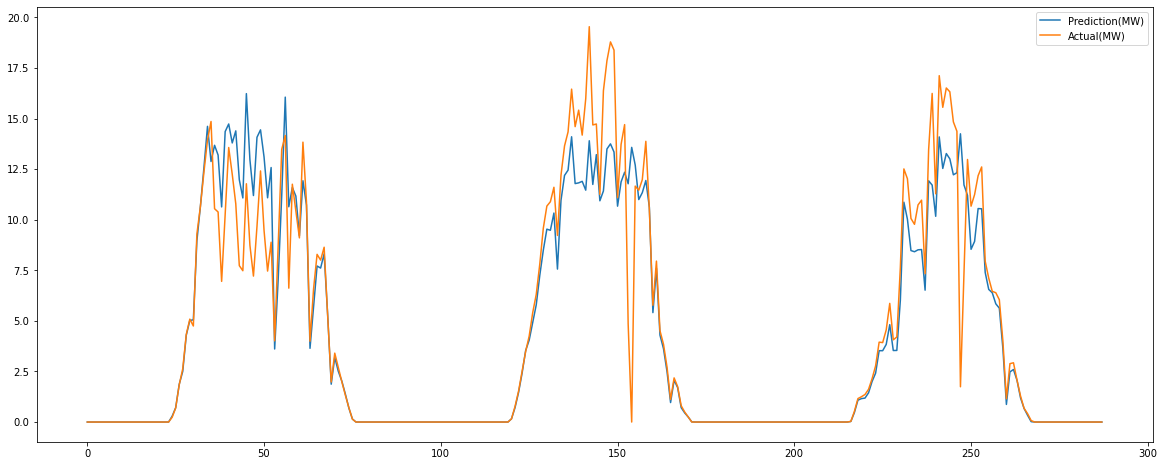

In [639]:
actual_vs_pred.plot(figsize = (20,8))

In [373]:
np.sqrt(mean_squared_error(a['rf_SMA_3'], a['AC_POWER']y_pred_rf))

2.1371941401963426

<AxesSubplot:>

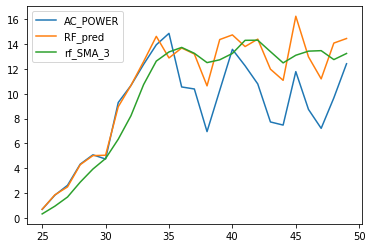

In [377]:
a[['AC_POWER','RF_pred','rf_SMA_3']][25:96].plot()

<AxesSubplot:>

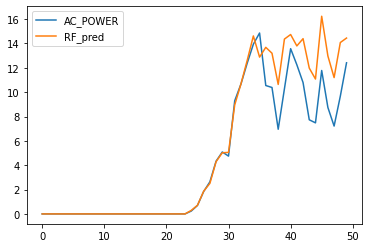

In [367]:
a[['AC_POWER', 'RF_pred']].reset_index(drop=True)[0:96].plot()

## Prediction using Polynomial features 

In [348]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train['AC_POWER'])
x_test_trans = poly.transform(x_test['AC_POWER'])
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred_poly = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8876258519428043


In [356]:
a=pd.concat([all,pd.DataFrame(y_pred_poly)],axis=1).head(50)

In [357]:
a.columns

Index(['AC_POWER', 'RF_pred', 'LR_pred', 0], dtype='object')

<AxesSubplot:>

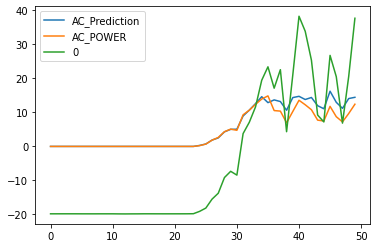

In [336]:
all.head(50).plot()

In [317]:
np.sqrt(mean_squared_error(y_test, y_pred_rf))

1.905732254066718

In [376]:
np.sqrt(mean_squared_error(y_test, y_pred_rf*0.95))

1.9479386695192624

RMSE did not improve with Polynomial features

## DSM and MAPE Analysis

In [591]:

# For states such as Madhya Pradesh, Uttar Pradesh, Andhra Pradesh, Karnataka
def dsm_code_1(avc,df_pred,df_act):
    #Renaming columns
    df_act.columns = ['BLOCK','DATE','TIME','Actual Gen (MW)']
    df_pred.columns = ['Predicted Gen (MW)']
    
    df = pd.concat([df_act,df_pred],axis=1)
    # Modified Deviation
    df['Deviation %'] = (abs(df_act['Actual Gen (MW)'] - df_pred['Predicted Gen (MW)']))/avc*100
    dsm_list = []
    
    ##Converting MW into kWh(unit)
    avc_units = avc * 250
    
    
    for i in range(len(df)):
        #No. of units deviated
        units_dev = abs((df['Actual Gen (MW)'][i]-df['Predicted Gen (MW)'][i]))*250
        dev = df['Deviation %'][i]
        #1st Deviation band
        if dev <=15:
            dsm_list.append(0)
        #2nd Deviation band
        elif dev>15 and dev<=25:
            dsm1 = (units_dev - (0.15*avc_units)) * 0.5
            dsm_list.append(abs(dsm1))
        #3rd Deviation band
        elif dev>25 and dev<=35:
            dsm1 =  0.1* avc_units * 0.5
            dsm2 = (units_dev - (0.25*avc_units)) * 1
            dsm_list.append(abs(dsm1)+abs(dsm2))
        #4th Deviation band
        else:  
            dsm1 =  0.1 * avc_units * 0.5
            dsm2 =  0.1 * avc_units * 1
            dsm3 = (units_dev -(0.35*avc_units)) * 1.5
            dsm_list.append(abs(dsm1)+abs(dsm2)+abs(dsm3))
            
    #Concat DSM blockwise in dataframe
    abc = pd.concat([df,pd.Series(dsm_list)],axis=1)
    
    abc.columns=['BLOCK','DATE','TIME','Actual Gen (MW)','Predicted Gen (MW)','Deviation %','DSM (Rs.)'] 
    abc = abc[['DATE','TIME','BLOCK','Actual Gen (MW)','Predicted Gen (MW)','Deviation %','DSM (Rs.)']]
    
    print('MAPE : {}%'.format(round(abc['Deviation %'].mean(),2)))
    print('Total DSM: Rs.{}'.format(round(abc['DSM (Rs.)'].sum(),2)))      

    return abc

# For states such as Gujarat
def dsm_code_2(avc,df_pred,df_act):

    #Renaming columns
    df_act.columns = ['BLOCK','DATE','TIME','Actual Gen (MW)']
    df_pred.columns = ['Predicted Gen (MW)']
    df = pd.concat([df_act,df_pred],axis=1)
    
    # Modified Deviation
    df['Deviation %'] = (abs(df_act['Actual Gen (MW)'] - df_pred['Predicted Gen (MW)']))/avc*100
    
    dsm_list = []
    
    ##Converting MW into kWh(unit)
    avc_units = avc * 250
    
    for i in range(len(df)):
        #No. of units deviated
        units_dev = abs((df['Actual Gen (MW)'][i]-df['Predicted Gen (MW)'][i]))*250
        dev = df['Deviation %'][i]
        #1st Deviation band
        if dev <= 7:
            dsm_list.append(0)
        #2nd Deviation band
        elif dev>7 and dev<=15:
            dsm1 = (units_dev - (0.07*avc_units)) * 0.25
            dsm_list.append(abs(dsm1))
        #3rd Deviation band
        elif dev>15 and dev<=23:
            dsm1 =  0.08 * avc_units * 0.25
            dsm2 = (units_dev - (0.23*avc_units)) * 0.5
            dsm_list.append(abs(dsm1)+abs(dsm2))
        #4th Deviation band
        else:  
            dsm1 =  0.08 * avc_units * 0.25
            dsm2 =  0.08 * avc_units * 0.5
            dsm3 = (units_dev -(0.23*avc_units)) * 0.75
            dsm_list.append(abs(dsm1)+abs(dsm2)+abs(dsm3))
    
    #Concat DSM blockwise in dataframe
    abc = pd.concat([df,pd.Series(dsm_list)],axis=1)
    
    abc.columns=['BLOCK','DATE','TIME','Actual Gen (MW)','Predicted Gen (MW)','Deviation %','DSM (Rs.)'] 
    abc = abc[['DATE','TIME','BLOCK','Actual Gen (MW)','Predicted Gen (MW)','Deviation %','DSM (Rs.)']]
    
    print('MAPE : {}%'.format(round(abc['Deviation %'].mean(),2)))
    print('Total DSM: Rs.{}'.format(round(abc['DSM (Rs.)'].sum(),2)))      


    return abc 

## Trying simple & exponential weighted moving averages 

In [664]:
report1_day1 = dsm_code_1(25,y_pred_rf[0:96].reset_index(drop=True),act_df[0:96].reset_index(drop=True))
display(report1_day1[30:45])

MAPE : 3.26%
Total DSM: Rs.398.01


DATE   TIME  BLOCK  Actual Gen (MW)  Predicted Gen (MW)  \
30  2020-06-15  07:30     31         4.748242            5.053110   
31  2020-06-15  07:45     32         9.296185            8.957355   
32  2020-06-15  08:00     33        10.663541           10.669745   
33  2020-06-15  08:15     34        12.367753           12.592976   
34  2020-06-15  08:30     35        13.938757           14.617767   
35  2020-06-15  08:45     36        14.858673           12.880580   
36  2020-06-15  09:00     37        10.546150           13.681627   
37  2020-06-15  09:15     38        10.383833           13.198420   
38  2020-06-15  09:30     39         6.954449           10.634836   
39  2020-06-15  09:45     40        10.270062           14.359497   
40  2020-06-15  10:00     41        13.571532           14.734718   
41  2020-06-15  10:15     42        12.251327           13.797473   
42  2020-06-15  10:30     43        10.790081           14.394024   
43  2020-06-15  10:45     44         7.730807           11.977557   
44  2020-06-15  11:00     45         7.480081           11.078604   

    Deviation %  DSM (Rs.)  
30     1.219474   0.000000  
31     1.355321   0.000000  
32     0.024815   0.000000  
33     0.900890   0.000000  
34     2.716039   0.000000  
35     7.912373   0.000000  
36    12.541906   0.000000  
37    11.258347   0.000000  
38    14.721550   0.000000  
39    16.357739  42.429329  
40     4.652741   0.000000  
41     6.184585   0.000000  
42    14.415773   0.000000  
43    16.987002  62.093815  
44    14.394088   0.000000

In [657]:
#report1_day1[25:60]

In [658]:
report1_day2 = dsm_code_1(25,y_pred_rf[96:96*2].reset_index(drop=True),act_df[96:96*2].reset_index(drop=True))

MAPE : 3.74%
Total DSM: Rs.4110.29


In [659]:
report1_day2 = dsm_code_1(25,y_pred_rf[96*2:96*3].reset_index(drop=True),act_df[96*2:96*3].reset_index(drop=True))

MAPE : 3.07%
Total DSM: Rs.2525.05


In [602]:
sma_pred = y_pred_rf.copy()

In [610]:
ewma_pred = y_pred_rf.copy()

In [611]:
sma_pred['Pred_SMA_2'] = y_pred_rf['Predicted Gen (MW)'].rolling(2, min_periods=1).mean()

In [621]:
ewma_pred['Pred_EWMA'] = y_pred_rf['Predicted Gen (MW)'].ewm(span=5, min_periods=1).mean()

In [535]:
act_df = df_test[['BLOCK','DATE','TIME','AC_POWER']]

In [573]:
report2_day1 = dsm_code_2(25,y_pred_rf[['Predicted Gen (MW)']][0:96],act_df[0:96].reset_index(drop=True))

MAPE : 3.26%
Total DSM: Rs.3171.96


In [607]:
report1_day1_sma2 = dsm_code_1(25,sma_pred[['Pred_SMA_2']].reset_index(drop=True),act_df[0:96].reset_index(drop=True))

MAPE : 4.38%
Total DSM: Rs.1534.58


In [623]:
report1_day1_ewma = dsm_code_1(25,ewma_pred[['Pred_EWMA']].reset_index(drop=True),act_df[0:96].reset_index(drop=True))

MAPE : 5.23%
Total DSM: Rs.1551.09


<AxesSubplot:>

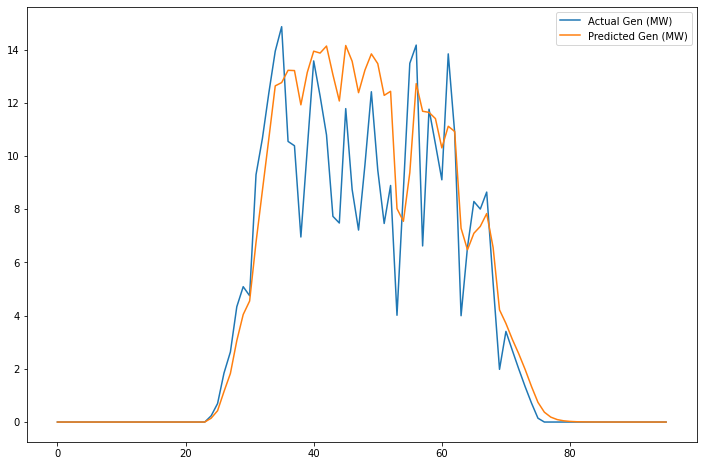

In [622]:
report1_day1_ewma[['Actual Gen (MW)','Predicted Gen (MW)']][0:96].plot(figsize=(12,8))

In [651]:
y_pred_rf

AC_Prediction
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
..             ...
283            0.0
284            0.0
285            0.0
286            0.0
287            0.0

[288 rows x 1 columns]

In [596]:
report1_day2 = dsm_code_1(25,y_pred_rf[['Predicted Gen (MW)']][96:96*2].reset_index(drop=True),act_df[96:96*2].reset_index(drop=True))

MAPE : 3.74%
Total DSM: Rs.4110.29


In [594]:
report2_day3 = dsm_code_2(25,y_pred_rf[['Predicted Gen (MW)']][96*2:96*3].reset_index(drop=True),act_df[96*2:96*3].reset_index(drop=True))

MAPE : 3.07%
Total DSM: Rs.2804.86


In [601]:
report1_day3 = dsm_code_1(25,y_pred_rf[['Predicted Gen (MW)']][96*2:96*3].reset_index(drop=True),act_df[96*2:96*3].reset_index(drop=True))

MAPE : 3.07%
Total DSM: Rs.2525.05


## Smoothing using Moving Averages

In [543]:
y_pred_rf

Predicted Gen (MW)
0                   0.0
1                   0.0
2                   0.0
3                   0.0
4                   0.0
..                  ...
283                 0.0
284                 0.0
285                 0.0
286                 0.0
287                 0.0

[288 rows x 1 columns]

In [544]:
y_pred_rf['SMA_3'] = y_pred_rf['Predicted Gen (MW)'].rolling(3, min_periods=1).mean()

In [546]:
y_pred_rf['SMA_2'] = y_pred_rf['Predicted Gen (MW)'].rolling(2, min_periods=1).mean()

In [549]:
y_pred_rf['SMA_5'] = y_pred_rf['Predicted Gen (MW)'].rolling(5, min_periods=1).mean()

In [552]:
report1_sma3 = dsm_code_1(25,y_pred_rf[['SMA_3']][0:96],act_df[0:96].reset_index(drop=True))

DATE   TIME  BLOCK  Actual Gen (MW)  Predicted Gen (MW)  \
0   2020-06-15  00:00      1              0.0                 0.0   
1   2020-06-15  00:15      2              0.0                 0.0   
2   2020-06-15  00:30      3              0.0                 0.0   
3   2020-06-15  00:45      4              0.0                 0.0   
4   2020-06-15  01:00      5              0.0                 0.0   
..         ...    ...    ...              ...                 ...   
91  2020-06-15  22:45     92              0.0                 0.0   
92  2020-06-15  23:00     93              0.0                 0.0   
93  2020-06-15  23:15     94              0.0                 0.0   
94  2020-06-15  23:30     95              0.0                 0.0   
95  2020-06-15  23:45     96              0.0                 0.0   

    Deviation %  DSM (Rs.)  
0           0.0        0.0  
1           0.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
..          ...        ...  
91          0.0        0.0  
92          0.0        0.0  
93          0.0        0.0  
94          0.0        0.0  
95          0.0        0.0  

[96 rows x 7 columns]

MAPE : 4.5%
Total DSM: Rs.2260.19


In [548]:
report1_sma2 = dsm_code_1(25,y_pred_rf[['SMA_2']],act_df.reset_index(drop=True))

DATE   TIME  BLOCK  Actual Gen (MW)  Predicted Gen (MW)  \
0    2020-06-15  00:00      1              0.0                 0.0   
1    2020-06-15  00:15      2              0.0                 0.0   
2    2020-06-15  00:30      3              0.0                 0.0   
3    2020-06-15  00:45      4              0.0                 0.0   
4    2020-06-15  01:00      5              0.0                 0.0   
..          ...    ...    ...              ...                 ...   
283  2020-06-17  22:45     92              0.0                 0.0   
284  2020-06-17  23:00     93              0.0                 0.0   
285  2020-06-17  23:15     94              0.0                 0.0   
286  2020-06-17  23:30     95              0.0                 0.0   
287  2020-06-17  23:45     96              0.0                 0.0   

     Deviation %  DSM (Rs.)  
0            0.0        0.0  
1            0.0        0.0  
2            0.0        0.0  
3            0.0        0.0  
4            0.0        0.0  
..           ...        ...  
283          0.0        0.0  
284          0.0        0.0  
285          0.0        0.0  
286          0.0        0.0  
287          0.0        0.0  

[288 rows x 7 columns]

MAPE : 4.55%
Total DSM: Rs.9367.04


In [550]:
report1_sma5 = dsm_code_1(25,y_pred_rf[['SMA_5']],act_df.reset_index(drop=True))

DATE   TIME  BLOCK  Actual Gen (MW)  Predicted Gen (MW)  \
0    2020-06-15  00:00      1              0.0                 0.0   
1    2020-06-15  00:15      2              0.0                 0.0   
2    2020-06-15  00:30      3              0.0                 0.0   
3    2020-06-15  00:45      4              0.0                 0.0   
4    2020-06-15  01:00      5              0.0                 0.0   
..          ...    ...    ...              ...                 ...   
283  2020-06-17  22:45     92              0.0                 0.0   
284  2020-06-17  23:00     93              0.0                 0.0   
285  2020-06-17  23:15     94              0.0                 0.0   
286  2020-06-17  23:30     95              0.0                 0.0   
287  2020-06-17  23:45     96              0.0                 0.0   

     Deviation %  DSM (Rs.)  
0            0.0        0.0  
1            0.0        0.0  
2            0.0        0.0  
3            0.0        0.0  
4            0.0        0.0  
..           ...        ...  
283          0.0        0.0  
284          0.0        0.0  
285          0.0        0.0  
286          0.0        0.0  
287          0.0        0.0  

[288 rows x 7 columns]

MAPE : 5.52%
Total DSM: Rs.10756.62


Text(0.5, 0, 'Block')

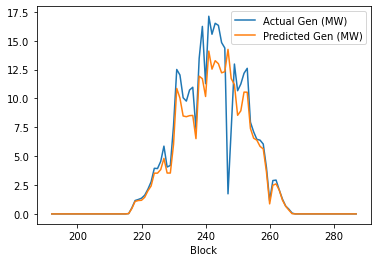

In [456]:
report1[['Actual Gen (MW)','Predicted Gen (MW)']][96*2:96*3].plot()
plt.xlabel('Block')

Text(0.5, 0, 'Block')

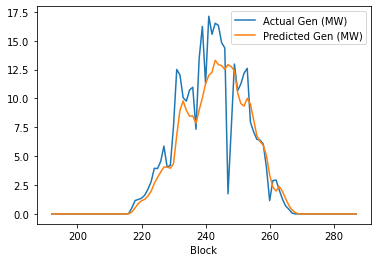

In [551]:
report1_sma3[['Actual Gen (MW)','Predicted Gen (MW)']][96*2:96*3].plot()
plt.xlabel('Block')

Could not find any improvement in these case using Simple Moving Averages and Exponentially weighted Moving Averages

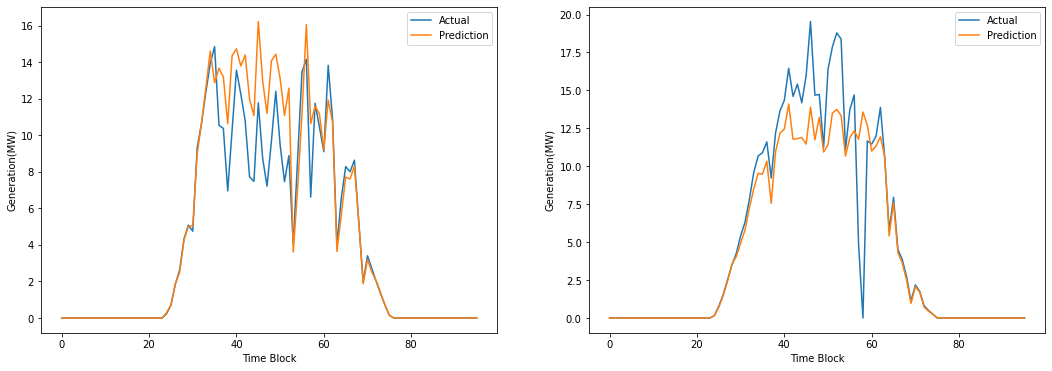

In [642]:
# For Plot 1
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# Day 1
ax1.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][0:96].reset_index(drop=True))
ax2.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96:96*2].reset_index(drop=True))
ax1.set_xlabel('Time Block')
ax1.set_ylabel('Generation(MW)')
# Day 2
ax2.set_xlabel('Time Block')
ax2.set_ylabel('Generation(MW)')
ax1.legend(['Actual','Prediction'])
plt.legend(['Actual','Prediction'])
plt.show()

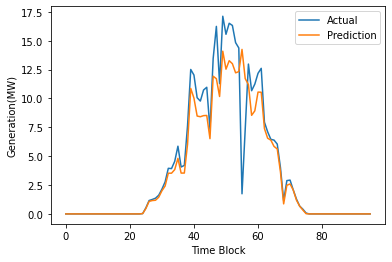

In [646]:
plt.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96*2:96*3].reset_index(drop=True))
plt.xlabel('Time Block')
plt.ylabel('Generation(MW)')
plt.legend(['Actual','Prediction'])
plt.show();

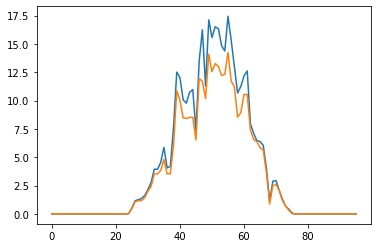

In [482]:
plt.plot(report1[['Actual Gen (MW)','Predicted Gen (MW)']][96*2:96*3].reset_index(drop=True))

In [304]:
np.sqrt(mean_squared_error(y_test, y_pred_rf))

1.905732254066718

In [297]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_rf))

0.8826563789118137


In [273]:
coefficient_of_dermination

0.8622125831618852

R Square is a good measure to determine how well the model fits the dependent variables. 
However, it does not take into consideration of overfitting problem. 
If your regression model has many independent variables, because the model is too complicated, 
it may fit very well to the training data but performs badly for testing data. 
That is why Adjusted R Square is introduced because it will penalize additional independent variables 
added to the model and adjust the metric to prevent overfitting issues.

In [253]:
def load_model(model_file):
	loaded_model = joblib.load(model_file)
	return loaded_model	

In [246]:
df_file = pd.read_csv('C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Solar Power Forecasting\\Testing data\\2020-06-17.csv')

In [256]:
df_file = df_file[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]

In [237]:
import joblib

# Saving the RF Model

joblib.dump(rf_model,'Solar_forecast_model_final.pkl')

['Solar_forecast_model_final.pkl']

## ANN 

In [283]:

from keras.layers import Dense
from keras.models import Sequential

ann_model = Sequential()
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(1))

In [292]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [293]:
ann_model.compile(loss=root_mean_squared_error)
ann_model.fit(x_train, y_train, epochs=50, batch_size = 1)

Epoch 1/50
2971/2971 [==============================] - 8s 2ms/step - loss: 0.8936
Epoch 2/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.9126
Epoch 3/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.9401
Epoch 4/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.9032
Epoch 5/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8998
Epoch 6/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.9238
Epoch 7/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8596
Epoch 8/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8747
Epoch 9/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8717
Epoch 10/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8745
Epoch 11/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8914
Epoch 12/50
2971/2971 [==============================] - 5s 2ms/step - loss: 0.8174
E

In [299]:
ann_pred = pd.DataFrame(ann_model.predict(x_test))
ann_pred.columns = ['ANN_pred']

In [302]:
pd.concat([y_pred_dt,y_test.reset_index(drop=True),ann_pred],axis=1).head(30)

AC_Pred  AC_POWER  ANN_pred
0   0.000000  0.000000  0.021546
1   0.000000  0.000000  0.021817
2   0.000000  0.000000  0.023180
3   0.000000  0.000000  0.024798
4   0.000000  0.000000  0.024497
5   0.000000  0.000000  0.025160
6   0.000000  0.000000  0.025285
7   0.000000  0.000000  0.024968
8   0.000000  0.000000  0.024517
9   0.000000  0.000000  0.025294
10  0.000000  0.000000  0.025101
11  0.000000  0.000000  0.023819
12  0.000000  0.000000  0.021517
13  0.000000  0.000000  0.019858
14  0.000000  0.000000  0.019639
15  0.000000  0.000000  0.016541
16  0.000000  0.000000  0.016992
17  0.000000  0.000000  0.020559
18  0.000000  0.000000  0.021806
19  0.000000  0.000000  0.021792
20  0.000000  0.000000  0.022303
21  0.000000  0.000000  0.020409
22  0.000000  0.000000  0.020952
23  0.000000  0.000000  0.022872
24  0.269563  0.234318  0.204826
25  0.716638  0.694693  0.681092
26  1.824320  1.838365  1.996959
27  2.513539  2.634299  2.948072
28  3.701199  4.333001  5.051588
29  4.487498  5.086728  5.977800

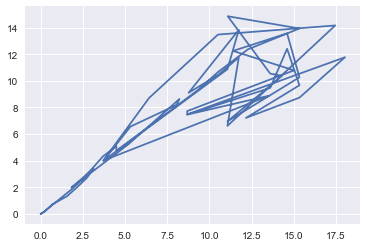

In [305]:
plt.plot(y_pred_dt[0:96],y_test[0:96])

<AxesSubplot:>

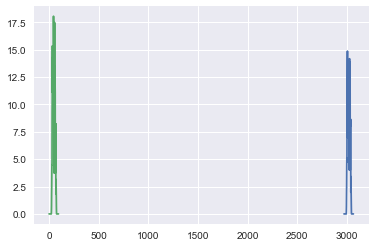

In [312]:
df_test['AC_POWER'][0:96].plot()
y_pred_dt['AC_Pred'].reset_index(drop=True)[0:96].plot()

<AxesSubplot:>

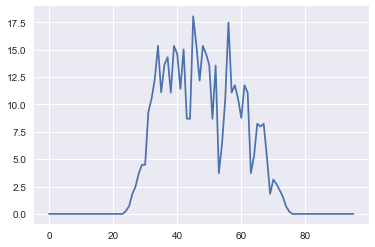

In [313]:
y_pred_dt['AC_Pred'].reset_index(drop=True)[0:96].plot()

In [303]:
np.sqrt(mean_squared_error(y_test,ann_pred))

1.8375766518886734

## Saving the model

In [198]:
import joblib

# Saving the RF Model

joblib.dump(rf_model,'Solar_forecast_model.pkl')


['Solar_forecast_model.pkl']

In [571]:
## Load the model
loaded_model = joblib.load('Solar_forecast_model_final.pkl') 
loaded_model.predict(X_test)

array([1.05793750e+04, 1.27095638e+04, 0.00000000e+00, 0.00000000e+00,
       1.46553739e+04, 1.80542084e+04, 4.17566812e+03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.73557207e+00, 2.67305761e+04,
       0.00000000e+00, 0.00000000e+00, 1.42267475e+03, 3.67464642e+03,
       4.12902624e+03, 1.35879216e+04, 0.00000000e+00, 1.36108260e+04,
       0.00000000e+00, 0.00000000e+00, 6.00832070e+02, 5.83399643e+03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.67127375e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.52715695e+03, 2.55531941e+03, 1.17096405e+03, 0.00000000e+00,
       2.08458345e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.07466037e+03, 1.98806649e+04, 0.00000000e+00, 1.02173102e+04,
       7.65659303e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78472299e-01, 0.00000000e+00, 2.49854880e+04,
       0.00000000e+00, 1.97034207e+04, 0.00000000e+00, 1.14270588e+04,
      

In [574]:
importances = loaded_model.feature_importances_

In [578]:
importances

array([6.10239698e-04, 7.28366009e-04, 9.98661394e-01])

In [575]:
imp_df = pd.DataFrame(importances,columns=["Importance"],index = X_test.columns).sort_values(by='Importance',ascending=False)

<AxesSubplot:ylabel='Importance'>

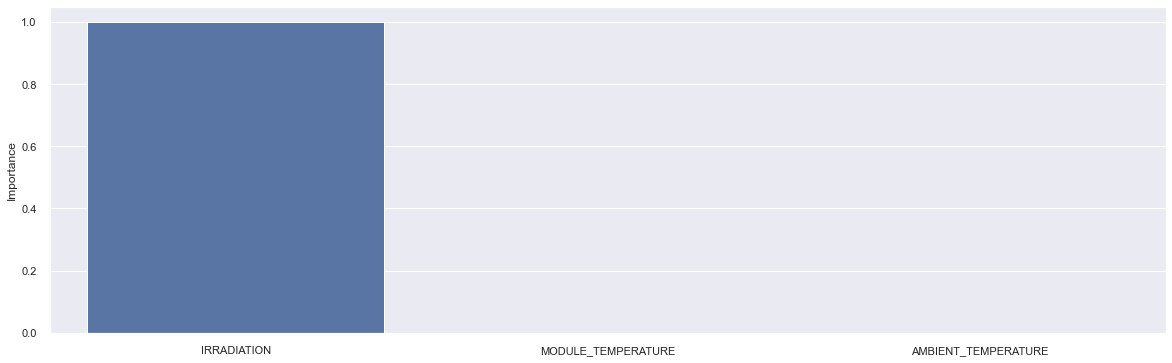

In [577]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=imp_df,x=imp_df.index,y='Importance')